# Part 3 : The international diversification strategy

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()
pd.set_option('display.max_columns', None)


In [184]:
df = pd.read_csv('merged_all_data.csv', index_col=0)

df = df.drop(columns={col for col in df.columns if col.startswith(('fic', 'currency'))})
df.head()

,mportret_AUSTRALIA,mportretx_AUSTRALIA,mportret_SWITZERLAND,mportretx_SWITZERLAND,mportret_GERMANY,mportretx_GERMANY,mportret_FRANCE,mportretx_FRANCE,mportret_UNITED KINGDOM,mportretx_UNITED KINGDOM,mportret_JAPAN,mportretx_JAPAN,rm_US,rf_US,fx_USUK,fx_SZUS,fx_JPUS,fx_USAL,fx_USEU,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,1.6709000000,132.6833000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,1.6970000000,133.6426000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,1.6743000000,131.0610000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,1.6542000000,130.7718000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,1.5889000000,126.3750000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000


## **(a)** Returns computed in USD

In [185]:
mapping = {
    'AUSTRALIA' : 'AUS',
    'SWITZERLAND' : 'CHE',
    'GERMANY' : 'DEU',
    'FRANCE' : 'FRA',
    'UNITED KINGDOM' : 'UK',
    'JAPAN' : 'JPN'
}
columns_to_rename = {col for col in df.columns if col.split('_')[-1] in mapping.keys()}

df = df.rename(columns={col: col.replace(col.split('_')[1], mapping[col.split('_')[1]]) for col in columns_to_rename})

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_USUK,fx_SZUS,fx_JPUS,fx_USAL,fx_USEU,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,1.6709000000,132.6833000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,1.6970000000,133.6426000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,1.6743000000,131.0610000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,1.6542000000,130.7718000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,1.5889000000,126.3750000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000


In [186]:
df['fx_USSZ'] = 1 / df['fx_SZUS']
df['fx_USJP'] = 1 / df['fx_JPUS']

df = df.drop(columns=['fx_SZUS', 'fx_JPUS'])

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_USUK,fx_USAL,fx_USEU,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_USSZ,fx_USJP
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000,0.6293662282,0.0079129575


In [187]:
mapping_fx_columns = {
    'fx_USUK' : 'fx_US_UK',
    'fx_USAL' : 'fx_US_AL',
    'fx_USEU' : 'fx_US_EUR',
    'fx_USSZ' : 'fx_US_CHF',
    'fx_USJP' : 'fx_US_JPY'
}

fx_columns = [col for col in df.columns if col.startswith('fx_')]

df = df.rename(columns={col: mapping_fx_columns[col] for col in fx_columns if col in fx_columns})

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_US_CHF,fx_US_JPY
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000,0.6293662282,0.0079129575


In [188]:
fx_columns = [ col for col in df.columns if col.startswith('fx_') and not col.endswith('_ret') ]

for fx_col in fx_columns:
    df[f'{fx_col}_ret'] = df[fx_col].pct_change()
    df[f'{fx_col}_ret'] = df[f'{fx_col}_ret'].shift(-1)

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435,-0.0066331518,-0.0081237911,-0.0141530797,-0.0153800825,-0.0071781004
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440,0.0002108667,0.0249609984,0.0067761571,0.0135579048,0.0196976980
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349,0.0139845397,0.0182648402,0.0107232489,0.0121508886,0.0022114860
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086,0.0117125234,0.0272795217,0.0349887133,0.0410976147,0.0347916914
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000,0.6293662282,0.0079129575,0.0163721058,0.0334667152,0.0426390403,0.0318202481,0.0250181482


In [189]:
fx_mapping = {
    'AUS': 'fx_US_AL_ret',
    'CHE': 'fx_US_CHF_ret',
    'DEU': 'fx_US_EUR_ret',
    'FRA': 'fx_US_EUR_ret',
    'UK': 'fx_US_UK_ret',
    'JPN': 'fx_US_JPY_ret'
}

for col in [col for col in df.columns if col.startswith('mportret_')]:
    
    df[f'{col}_us_adjusted'] = df[col] * ( 1 + df[fx_mapping[col.split('_')[1]]])

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435,-0.0066331518,-0.0081237911,-0.0141530797,-0.0153800825,-0.0071781004,0.0271356072,-0.0217859789,0.0121034841,-0.0267212300,-0.0107940219,-0.0562484730
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440,0.0002108667,0.0249609984,0.0067761571,0.0135579048,0.0196976980,-0.0018776660,0.0118188055,-0.0088668966,-0.0044237425,-0.0033413611,0.0430880046
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349,0.0139845397,0.0182648402,0.0107232489,0.0121508886,0.0022114860,0.0052937651,0.0493518990,0.0498570827,0.0526394927,0.0394744855,0.0532365625
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086,0.0117125234,0.0272795217,0.0349887133,0.0410976147,0.0347916914,-0.0146921278,-0.0042774546,-0.0466060689,-0.0455267877,-0.0135183846,0.0213021997
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000,0.6293662282,0.0079129575,0.0163721058,0.0334667152,0.0426390403,0.0318202481,0.0250181482,-0.0002106062,0.0030571562,-0.0267986982,-0.0292107147,-0.0116704552,0.0368876136


## **(b)** currency hedged index returns

In [190]:
interbank_mapping = {
    'uk' : 'UK_interbank',
    'japan': 'JPY_interbank', 
    'ch' : 'CHF_interbank',
    'us' : 'US_interbank',
    'australia': 'AUD_interbank',
    'euro' : 'EUR_interbank'
}

df = df.rename(columns={col: interbank_mapping[col.split('_')[0]] for col in df.columns if col.endswith('interbank')})

for col in [col for col in df.columns if col.endswith('interbank')]:
    
    df[f"rf_{col.split('_')[0]}_monthly"] = df[col] / 12 / 100

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,EUR_interbank,CHF_interbank,US_interbank,AUD_interbank,JPY_interbank,UK_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_EUR_monthly,rf_CHF_monthly,rf_US_monthly,rf_AUD_monthly,rf_JPY_monthly,rf_UK_monthly
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435,-0.0066331518,-0.0081237911,-0.0141530797,-0.0153800825,-0.0071781004,0.0271356072,-0.0217859789,0.0121034841,-0.0267212300,-0.0107940219,-0.0562484730,0.0027823106,0.0013364376,0.0014500000,0.0035500000,NaN,0.0033723083
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440,0.0002108667,0.0249609984,0.0067761571,0.0135579048,0.0196976980,-0.0018776660,0.0118188055,-0.0088668966,-0.0044237425,-0.0033413611,0.0430880046,0.0027975833,0.0013055588,0.0015166667,0.0035916667,NaN,0.0033772333
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349,0.0139845397,0.0182648402,0.0107232489,0.0121508886,0.0022114860,0.0052937651,0.0493518990,0.0498570827,0.0526394927,0.0394744855,0.0532365625,0.0028256667,0.0013368031,0.0015916667,0.0037166667,NaN,0.0034421250
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086,0.0117125234,0.0272795217,0.0349887133,0.0410976147,0.0347916914,-0.0146921278,-0.0042774546,-0.0466060689,-0.0455267877,-0.0135183846,0.0213021997,0.0028390873,0.0012172055,0.0015583333,0.0038250000,0.0000833333,0.0034776583
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000,0.6293662282,0.0079129575,0.0163721058,0.0334667152,0.0426390403,0.0318202481,0.0250181482,-0.0002106062,0.0030571562,-0.0267986982,-0.0292107147,-0.0116704552,0.0368876136,0.0028892803,0.0009695782,0.0015166667,0.0040333333,0.0000666667,0.0034614167


In [191]:
hedging_mapping = {
    'fx_US_CHF_ret': 'rf_CHF_monthly',
    'fx_US_JPY_ret': 'rf_JPY_monthly',
    'fx_US_UK_ret': 'rf_UK_monthly',
    'fx_US_AL_ret': 'rf_AUD_monthly',
    'fx_US_EUR_ret': 'rf_EUR_monthly',
}

columns_hedging = [col for col in hedging_mapping.keys()]

for col in columns_hedging:
    df[f'{col}_hedging'] = (1 + df[col]) * ( 1 + df[hedging_mapping[col]]) - ( 1 + df['rf_US'] )

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,EUR_interbank,CHF_interbank,US_interbank,AUD_interbank,JPY_interbank,UK_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_EUR_monthly,rf_CHF_monthly,rf_US_monthly,rf_AUD_monthly,rf_JPY_monthly,rf_UK_monthly,fx_US_CHF_ret_hedging,fx_US_JPY_ret_hedging,fx_US_UK_ret_hedging,fx_US_AL_ret_hedging,fx_US_EUR_ret_hedging
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435,-0.0066331518,-0.0081237911,-0.0141530797,-0.0153800825,-0.0071781004,0.0271356072,-0.0217859789,0.0121034841,-0.0267212300,-0.0107940219,-0.0562484730,0.0027823106,0.0013364376,0.0014500000,0.0035500000,NaN,0.0033723083,-0.0154721101,NaN,-0.0046911232,-0.0060105412,-0.0128180580
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440,0.0002108667,0.0249609984,0.0067761571,0.0135579048,0.0196976980,-0.0018776660,0.0118188055,-0.0088668966,-0.0044237425,-0.0033413611,0.0430880046,0.0027975833,0.0013055588,0.0015166667,0.0035916667,NaN,0.0033772333,0.0134372861,NaN,0.0021449339,0.0271984385,0.0081488191
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349,0.0139845397,0.0182648402,0.0107232489,0.0121508886,0.0022114860,0.0052937651,0.0493518990,0.0498570827,0.0526394927,0.0394744855,0.0532365625,0.0028256667,0.0013368031,0.0015916667,0.0037166667,NaN,0.0034421250,0.0120790987,NaN,0.0160499649,0.0206245548,0.0121543795
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086,0.0117125234,0.0272795217,0.0349887133,0.0410976147,0.0347916914,-0.0146921278,-0.0042774546,-0.0466060689,-0.0455267877,-0.0135183846,0.0213021997,0.0028390873,0.0012172055,0.0015583333,0.0038250000,0.0000833333,0.0034776583,0.0409042153,0.0334172949,0.0137702847,0.0297482367,0.0364665075
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000,0.6293662282,0.0079129575,0.0163721058,0.0334667152,0.0426390403,0.0318202481,0.0250181482,-0.0002106062,0.0030571562,-0.0267986982,-0.0292107147,-0.0116704552,0.0368876136,0.0028892803,0.0009695782,0.0015166667,0.0040333333,0.0000666667,0.0034614167,0.0314127679,0.0236785721,0.0184822824,0.0362271203,0.0442436061


In [192]:
mapping_currency_hedged = { 
    'mportret_AUS_us_adjusted': 'fx_US_AL_ret_hedging',
    'mportret_CHE_us_adjusted': 'fx_US_CHF_ret_hedging',
    'mportret_DEU_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_FRA_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_UK_us_adjusted': 'fx_US_UK_ret_hedging',
    'mportret_JPN_us_adjusted': 'fx_US_JPY_ret_hedging'
}

for col in mapping_currency_hedged.keys():
    df[f'{col}_hedged'] = df[col] - df[mapping_currency_hedged[col]]

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,EUR_interbank,CHF_interbank,US_interbank,AUD_interbank,JPY_interbank,UK_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_EUR_monthly,rf_CHF_monthly,rf_US_monthly,rf_AUD_monthly,rf_JPY_monthly,rf_UK_monthly,fx_US_CHF_ret_hedging,fx_US_JPY_ret_hedging,fx_US_UK_ret_hedging,fx_US_AL_ret_hedging,fx_US_EUR_ret_hedging,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435,-0.0066331518,-0.0081237911,-0.0141530797,-0.0153800825,-0.0071781004,0.0271356072,-0.0217859789,0.0121034841,-0.0267212300,-0.0107940219,-0.0562484730,0.0027823106,0.0013364376,0.0014500000,0.0035500000,NaN,0.0033723083,-0.0154721101,NaN,-0.0046911232,-0.0060105412,-0.0128180580,0.0331461484,-0.0063138688,0.0249215421,-0.0139031720,-0.0061028987,NaN
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440,0.0002108667,0.0249609984,0.0067761571,0.0135579048,0.0196976980,-0.0018776660,0.0118188055,-0.0088668966,-0.0044237425,-0.0033413611,0.0430880046,0.0027975833,0.0013055588,0.0015166667,0.0035916667,NaN,0.0033772333,0.0134372861,NaN,0.0021449339,0.0271984385,0.0081488191,-0.0290761045,-0.0016184806,-0.0170157157,-0.0125725616,-0.0054862950,NaN
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349,0.0139845397,0.0182648402,0.0107232489,0.0121508886,0.0022114860,0.0052937651,0.0493518990,0.0498570827,0.0526394927,0.0394744855,0.0532365625,0.0028256667,0.0013368031,0.0015916667,0.0037166667,NaN,0.0034421250,0.0120790987,NaN,0.0160499649,0.0206245548,0.0121543795,-0.0153307897,0.0372728002,0.0377027032,0.0404851132,0.0234245206,NaN
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086,0.0117125234,0.0272795217,0.0349887133,0.0410976147,0.0347916914,-0.0146921278,-0.0042774546,-0.0466060689,-0.0455267877,-0.0135183846,0.0213021997,0.0028390873,0.0012172055,0.0015583333,0.0038250000,0.0000833333,0.0034776583,0.0409042153,0.0334172949,0.0137702847,0.0297482367,0.0364665075,-0.0444403645,-0.0451816699,-0.0830725763,-0.0819932952,-0.0272886693,-0.0121150952
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.820000

## **(c)** implementation of strategies for us diversification

### **1.** Equal weight

In [193]:
non_hedged_columns = [col for col in df.columns if col.startswith('mportret_') and 'us_adjusted' in col and not col.endswith('_hedged')] + ['rf_US']
hedged_columns = [col for col in df.columns if col.endswith('_hedged')] + ['rf_US']

df_non_hedged_columns = df[non_hedged_columns]
df_hedged_columns = df[hedged_columns]

print(df_non_hedged_columns.head())
print('--'*20)
print(df_hedged_columns.head())

            mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                             
2002-01-31              0.0271356072             -0.0217859789   
2002-02-28             -0.0018776660              0.0118188055   
2002-03-28              0.0052937651              0.0493518990   
2002-04-30             -0.0146921278             -0.0042774546   
2002-05-31             -0.0002106062              0.0030571562   

            mportret_DEU_us_adjusted  mportret_FRA_us_adjusted  \
date                                                             
2002-01-31              0.0121034841             -0.0267212300   
2002-02-28             -0.0088668966             -0.0044237425   
2002-03-28              0.0498570827              0.0526394927   
2002-04-30             -0.0466060689             -0.0455267877   
2002-05-31             -0.0267986982             -0.0292107147   

            mportret_UK_us_adjusted  mportret_JPN_us_adjusted        rf_US

In [194]:
df_hedged_columns['equal_weight_ret'] = df_hedged_columns.mean(axis=1)
df_non_hedged_columns['equal_weight_ret'] = df_non_hedged_columns.mean(axis=1)

df_hedged_columns['cum_prod_equal_weight'] = (1 + df_hedged_columns['equal_weight_ret']).cumprod() #/ df_hedged_columns['equal_weight_ret'].iloc[0]
df_non_hedged_columns['cum_prod_equal_weight'] = (1 + df_non_hedged_columns['equal_weight_ret']).cumprod() #/ df_non_hedged_columns['equal_weight_ret'].iloc[0]

C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\200826055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hedged_columns['equal_weight_ret'] = df_hedged_columns.mean(axis=1)
C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\200826055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_hedged_columns['equal_weight_ret'] = df_non_hedged_columns.mean(axis=1)
C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\200826055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

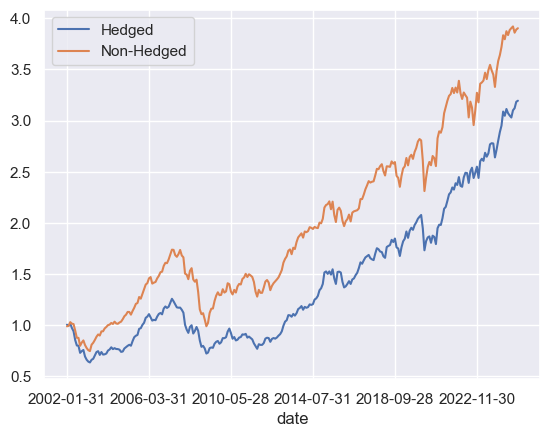

In [195]:
import matplotlib.pyplot as plt

df_hedged_columns['cum_prod_equal_weight'].plot()
df_non_hedged_columns['cum_prod_equal_weight'].plot()

plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [196]:
def compute_sharpe_ratio(series, rf):
    return (series - rf).mean() * np.sqrt(252) / series.std()

sr_ew_hedged = compute_sharpe_ratio(df_hedged_columns['equal_weight_ret'], df_hedged_columns['rf_US'])
sr_ew_non_hedged = compute_sharpe_ratio(df_non_hedged_columns['equal_weight_ret'], df_non_hedged_columns['rf_US'])

print(f'The SR of the EW non hedged startegy is : {sr_ew_non_hedged}')
print(f'The mean of the returns is : {df_non_hedged_columns["equal_weight_ret"].mean()}')
print(f'The standard deviation of the returns is : {df_non_hedged_columns["equal_weight_ret"].std()}')
print('--'*20)
print(f'The SR of the EW hedged startegy is : {sr_ew_hedged}')
print(f'The mean of the returns is : {df_hedged_columns["equal_weight_ret"].mean()}')
print(f'The standard deviation of the returns is : {df_hedged_columns["equal_weight_ret"].std()}')


The SR of the EW non hedged startegy is : 2.0702979351354274
The mean of the returns is : 0.00547250304588656
The standard deviation of the returns is : 0.032337103786838
----------------------------------------
The SR of the EW hedged startegy is : 1.683516580184917
The mean of the returns is : 0.004769397543864287
The standard deviation of the returns is : 0.03313658209963709


### **2.** Risk parity ( without indication doing the unlevered version )

In [197]:
df_rp_hedged = df_hedged_columns.copy()
df_rp_non_hedged = df_non_hedged_columns.copy()

In [198]:
index_columns = [col for col in df_rp_non_hedged.columns if col.startswith('mportret_')]

for col in index_columns:
    df_rp_hedged.loc[:,f'rolling_std_{col}_hedged'] = df_rp_hedged.loc[:,col + '_hedged'].rolling(window=60).std()
    df_rp_non_hedged.loc[:,f'rolling_std_{col}'] = df_rp_non_hedged.loc[:,col].rolling(window=60).std()

df_rp_hedged.dropna(inplace=True)
df_rp_non_hedged.dropna(inplace=True)

In [199]:
df_rp_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,equal_weight_ret,cum_prod_equal_weight,rolling_std_mportret_AUS_us_adjusted_hedged,rolling_std_mportret_CHE_us_adjusted_hedged,rolling_std_mportret_DEU_us_adjusted_hedged,rolling_std_mportret_FRA_us_adjusted_hedged,rolling_std_mportret_UK_us_adjusted_hedged,rolling_std_mportret_JPN_us_adjusted_hedged
date,,,,,,,,,,,,,,,
2007-03-30,-0.0081560228,0.0312334756,0.0149122857,0.0132865078,0.0115926451,0.0026823557,0.0042090760,0.0099657604,1.1807965281,0.0300821657,0.0499040136,0.0583684015,0.0509540951,0.0418070433,0.0495620640
2007-04-30,0.0312115861,0.0685235533,0.0540053675,0.0471560372,0.0244441680,0.0091966805,0.0039621558,0.0340713641,1.2210278764,0.0296194691,0.0501572611,0.0577001671,0.0501294281,0.0417604920,0.0494755403
2007-05-31,0.0076203516,0.0240937329,0.0585720623,0.0506285397,0.0235621449,0.0463178749,0.0039122651,0.0306724245,1.2584797618,0.0291220680,0.0500043889,0.0572945693,0.0494899446,0.0416519977,0.0496895346
2007-06-29,-0.0311219582,-0.0431042012,-0.0157390194,-0.0171906306,-0.0376183887,0.0033816801,0.0037762458,-0.0196594675,1.2337387198,0.0294833703,0.0470809334,0.0552578483,0.0465842043,0.0377688685,0.0460173069
2007-07-31,0.0268327370,-0.0362218587,-0.0299931120,-0.0378076667,-0.0231219308,-0.0781141243,0.0042545740,-0.0248816259,1.2030412945,0.0294701141,0.0447295254,0.0539033814,0.0452780480,0.0364068661,0.0468840456


In [200]:
rolling_std_columns = [col for col in df_rp_non_hedged.columns if col.startswith('rolling_std')]

for col in rolling_std_columns:

    df_rp_hedged[f'weight_{col}_hedged'] = 1 / df_rp_hedged[col+'_hedged']
    df_rp_non_hedged[f'weight_{col}'] = 1 / df_rp_non_hedged[col]

df_rp_non_hedged.head()

,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_US,equal_weight_ret,cum_prod_equal_weight,rolling_std_mportret_AUS_us_adjusted,rolling_std_mportret_CHE_us_adjusted,rolling_std_mportret_DEU_us_adjusted,rolling_std_mportret_FRA_us_adjusted,rolling_std_mportret_UK_us_adjusted,rolling_std_mportret_JPN_us_adjusted,weight_rolling_std_mportret_AUS_us_adjusted,weight_rolling_std_mportret_CHE_us_adjusted,weight_rolling_std_mportret_DEU_us_adjusted,weight_rolling_std_mportret_FRA_us_adjusted,weight_rolling_std_mportret_UK_us_adjusted,weight_rolling_std_mportret_JPN_us_adjusted
date,,,,,,,,,,,,,,,,,,,,,
2006-12-29,0.0378205267,0.0455080714,0.0469103472,0.0439637906,0.0339061593,0.0465548919,0.0039735395,0.0369481895,1.5799112852,0.0258902212,0.0419256609,0.0548464321,0.0459620709,0.0371512784,0.0434538608,38.6246217742,23.8517408629,18.2327265832,21.7570701253,26.9169741369,23.0129148864
2007-01-31,0.0191893512,0.0418533387,0.0343736618,0.0109398284,-0.0016824074,0.0242858125,0.0041672042,0.0190181128,1.6099582162,0.0258362533,0.0419606627,0.0549479114,0.0457396165,0.0370937208,0.0425988383,38.7053024946,23.8318447677,18.1990538876,21.8628855457,26.9587406722,23.4748185640
2007-02-28,0.0175370828,-0.0339526767,-0.0069374519,-0.0104743336,-0.0016679655,0.0165659574,0.0042860844,-0.0020919004,1.6065903439,0.0257716645,0.0423267723,0.0549380408,0.0457750294,0.0370859271,0.0424041560,38.8023055327,23.6257088717,18.2023236687,21.8459717833,26.9644061483,23.5825941342
2007-03-30,0.0362140101,0.0332862875,0.0341680201,0.0325422422,0.0329012557,-0.0150462239,0.0042090760,0.0226106668,1.6429164229,0.0259225149,0.0421138568,0.0547759133,0.0455178972,0.0370000856,0.0421724904,38.5765040017,23.7451536309,18.2561994652,21.9693804091,27.0269645076,23.7121400981
2007-04-30,0.0303404010,0.0592766924,0.0537271708,0.0468778406,0.0233194814,-0.0094738567,0.0039621558,0.0297185550,1.6917415251,0.0257416041,0.0425919503,0.0545983094,0.0452396912,0.0369494595,0.0422205853,38.8476179266,23.4786149478,18.3155854406,22.1044833266,27.0639953163,23.6851287696


In [201]:
weight_columns_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('weight')]
weight_columns_hedged = [col for col in df_rp_hedged.columns if col.startswith('weight')]

weights_strat_non_hedged = []
weights_strat_hedged = []

for col in weight_columns_non_hedged:
    df_rp_non_hedged[f'standardized_{col}'] = df_rp_non_hedged[col] / df_rp_non_hedged[weight_columns_non_hedged].sum(axis=1)
    weights_strat_non_hedged.append(f'standardized_{col}')

for col in weight_columns_hedged:
    df_rp_hedged[f'standardized_{col}'] = df_rp_hedged[col] / df_rp_hedged[weight_columns_hedged].sum(axis=1)
    weights_strat_hedged.append(f'standardized_{col}')

df_rp_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,equal_weight_ret,cum_prod_equal_weight,rolling_std_mportret_AUS_us_adjusted_hedged,rolling_std_mportret_CHE_us_adjusted_hedged,rolling_std_mportret_DEU_us_adjusted_hedged,rolling_std_mportret_FRA_us_adjusted_hedged,rolling_std_mportret_UK_us_adjusted_hedged,rolling_std_mportret_JPN_us_adjusted_hedged,weight_rolling_std_mportret_AUS_us_adjusted_hedged,weight_rolling_std_mportret_CHE_us_adjusted_hedged,weight_rolling_std_mportret_DEU_us_adjusted_hedged,weight_rolling_std_mportret_FRA_us_adjusted_hedged,weight_rolling_std_mportret_UK_us_adjusted_hedged,weight_rolling_std_mportret_JPN_us_adjusted_hedged,standardized_weight_rolling_std_mportret_AUS_us_adjusted_hedged,standardized_weight_rolling_std_mportret_CHE_us_adjusted_hedged,standardized_weight_rolling_std_mportret_DEU_us_adjusted_hedged,standardized_weight_rolling_std_mportret_FRA_us_adjusted_hedged,standardized_weight_rolling_std_mportret_UK_us_adjusted_hedged,standardized_weight_rolling_std_mportret_JPN_us_adjusted_hedged
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-03-30,-0.0081560228,0.0312334756,0.0149122857,0.0132865078,0.0115926451,0.0026823557,0.0042090760,0.0099657604,1.1807965281,0.0300821657,0.0499040136,0.0583684015,0.0509540951,0.0418070433,0.0495620640,33.2422874347,20.0384683987,17.1325575741,19.6255079868,23.9194145587,20.1767222644,0.2478271725,0.1493903503,0.1277262676,0.1463116569,0.1783234951,0.1504210575
2007-04-30,0.0312115861,0.0685235533,0.0540053675,0.0471560372,0.0244441680,0.0091966805,0.0039621558,0.0340713641,1.2210278764,0.0296194691,0.0501572611,0.0577001671,0.0501294281,0.0417604920,0.0494755403,33.7615774606,19.9372928005,17.3309723262,19.9483624417,23.9460780501,20.2120076766,0.2498335367,0.1475347051,0.1282480985,0.1476166197,0.1771994622,0.1495675778
2007-05-31,0.0076203516,0.0240937329,0.0585720623,0.0506285397,0.0235621449,0.0463178749,0.0039122651,0.0306724245,1.2584797618,0.0291220680,0.0500043889,0.0572945693,0.0494899446,0.0416519977,0.0496895346,34.3382207328,19.9982445870,17.4536611824,20.2061248571,24.0084523183,20.1249621051,0.2522464191,0.1469058524,0.1282135020,0.1484329278,0.1763645873,0.1478367113
2007-06-29,-0.0311219582,-0.0431042012,-0.0157390194,-0.0171906306,-0.0376183887,0.0033816801,0.0037762458,-0.0196594675,1.2337387198,0.0294833703,0.0470809334,0.0552578483,0.0465842043,0.0377688685,0.0460173069,33.9174249227,21.2400207110,18.0969768284,21.4665038436,26.4768323437,21.7309544353,0.2373030876,0.1486056948,0.1266154045,0.1501902828,0.1852450202,0.1520405100
2007-07-31,0.0268327370,-0.0362218587,-0.0299931120,-0.0378076667,-0.0231219308,-0.0781141243,0.0042545740,-0.0248816259,1.2030412945,0.0294701141,0.0447295254,0.0539033814,0.0452780480,0.0364068661,0.0468840456,33.9326816281,22.3565976185,18.5517118711,22.0857577802,27.4673463660,21.3292173599,0.2328569192,0.1534181266,0.1273077831,0.1515595369,0.1884897198,0.1463679145


In [202]:
ret_columns_hedged = [col for col in df_rp_hedged.columns if col.startswith('mportret_')]
ret_columns_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('mportret_')]

for x, y in zip(ret_columns_hedged, weights_strat_hedged):
    df_rp_hedged[f'strat_{x}'] = df_rp_hedged[x] * df_rp_hedged[y].shift(1)

for x, y in zip(ret_columns_non_hedged, weights_strat_non_hedged):
    df_rp_non_hedged[f'strat_{x}'] = df_rp_non_hedged[x] * df_rp_non_hedged[y].shift(1)

In [203]:
strat_col_hedged = [col for col in df_rp_hedged.columns if col.startswith('strat_')]
strat_col_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('strat_')]

df_rp_hedged['rp_return'] = df_rp_hedged[strat_col_hedged].sum(axis=1)
df_rp_non_hedged['rp_return'] = df_rp_non_hedged[strat_col_non_hedged].sum(axis=1)

df_rp_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,equal_weight_ret,cum_prod_equal_weight,rolling_std_mportret_AUS_us_adjusted_hedged,rolling_std_mportret_CHE_us_adjusted_hedged,rolling_std_mportret_DEU_us_adjusted_hedged,rolling_std_mportret_FRA_us_adjusted_hedged,rolling_std_mportret_UK_us_adjusted_hedged,rolling_std_mportret_JPN_us_adjusted_hedged,weight_rolling_std_mportret_AUS_us_adjusted_hedged,weight_rolling_std_mportret_CHE_us_adjusted_hedged,weight_rolling_std_mportret_DEU_us_adjusted_hedged,weight_rolling_std_mportret_FRA_us_adjusted_hedged,weight_rolling_std_mportret_UK_us_adjusted_hedged,weight_rolling_std_mportret_JPN_us_adjusted_hedged,standardized_weight_rolling_std_mportret_AUS_us_adjusted_hedged,standardized_weight_rolling_std_mportret_CHE_us_adjusted_hedged,standardized_weight_rolling_std_mportret_DEU_us_adjusted_hedged,standardized_weight_rolling_std_mportret_FRA_us_adjusted_hedged,standardized_weight_rolling_std_mportret_UK_us_adjusted_hedged,standardized_weight_rolling_std_mportret_JPN_us_adjusted_hedged,strat_mportret_AUS_us_adjusted_hedged,strat_mportret_CHE_us_adjusted_hedged,strat_mportret_DEU_us_adjusted_hedged,strat_mportret_FRA_us_adjusted_hedged,strat_mportret_UK_us_adjusted_hedged,strat_mportret_JPN_us_adjusted_hedged,rp_return
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-03-30,-0.0081560228,0.0312334756,0.0149122857,0.0132865078,0.0115926451,0.0026823557,0.0042090760,0.0099657604,1.1807965281,0.0300821657,0.0499040136,0.0583684015,0.0509540951,0.0418070433,0.0495620640,33.2422874347,20.0384683987,17.1325575741,19.6255079868,23.9194145587,20.1767222644,0.2478271725,0.1493903503,0.1277262676,0.1463116569,0.1783234951,0.1504210575,NaN,NaN,NaN,NaN,NaN,NaN,0.0000000000
2007-04-30,0.0312115861,0.0685235533,0.0540053675,0.0471560372,0.0244441680,0.0091966805,0.0039621558,0.0340713641,1.2210278764,0.0296194691,0.0501572611,0.0577001671,0.0501294281,0.0417604920,0.0494755403,33.7615774606,19.9372928005,17.3309723262,19.9483624417,23.9460780501,20.2120076766,0.2498335367,0.1475347051,0.1282480985,0.1476166197,0.1771994622,0.1495675778,0.0077350791,0.0102367576,0.0068979040,0.0068994779,0.0043589695,0.0013833744,0.0375115626
2007-05-31,0.0076203516,0.0240937329,0.0585720623,0.0506285397,0.0235621449,0.0463178749,0.0039122651,0.0306724245,1.2584797618,0.0291220680,0.0500043889,0.0572945693,0.0494899446,0.0416519977,0.0496895346,34.3382207328,19.9982445870,17.4536611824,20.2061248571,24.0084523183,20.1249621051,0.2522464191,0.1469058524,0.1282135020,0.1484329278,0.1763645873,0.1478367113,0.0019038194,0.0035546618,0.0075117556,0.0074736139,0.0041751994,0.0069276523,0.0315467024
2007-06-29,-0.0311219582,-0.0431042012,-0.0157390194,-0.0171906306,-0.0376183887,0.0033816801,0.0037762458,-0.0196594675,1.2337387198,0.0294833703,0.0470809334,0.0552578483,0.0465842043,0.0377688685,0.0460173069,33.9174249227,21.2400207110,18.0969768284,21.4665038436,26.4768323437,21.7309544353,0.2373030876,0.1486056948,0.1266154045,0.1501902828,0.1852450202,0.1520405100,-0.0078504025,-0.0063322594,-0.0020179548,-0.0025516556,-0.0066345516,0.0004999365,-0.0248868875
2007-07-31,0.0268327370,-0.0362218587,-0.0299931120,-0.0378076667,-0.0231219308,-0.0781141243,0.0042545740,-0.0248816259,1.2030412945,0.0294701141,0.0447295254,0.0539033814,0.0452780480,0.0364068661,0.0468840456,33.9326816281,22.3565976185,18.5517118711,22.0857577802,27.4673463660,21.3292173599,0.2328569192,0.1534181266,0.1273077831,0.1515595369,0.1884897198,0.1463679145,0.0063674913,-0.0053827745,-0.0037975900,-0.0056783442,-0.0042832225,-0.0118765113,-0.0246509511


In [204]:
df_rp_hedged['cumprod_rp_return'] = (1 + df_rp_hedged['rp_return']).cumprod()
df_rp_non_hedged['cumprod_rp_return'] = (1 + df_rp_non_hedged['rp_return']).cumprod()

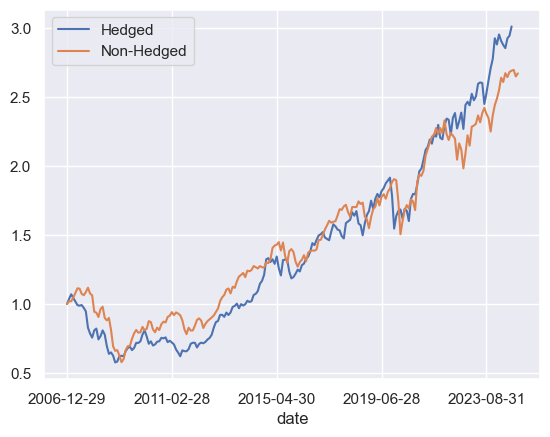

In [205]:
df_rp_hedged['cumprod_rp_return'].plot()
df_rp_non_hedged['cumprod_rp_return'].plot()

plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [206]:
sr_rp_hedged = compute_sharpe_ratio(df_rp_hedged['rp_return'], df_rp_hedged['rf_US'])
sr_rp_non_hedged = compute_sharpe_ratio(df_rp_non_hedged['rp_return'], df_rp_non_hedged['rf_US'])

print(f'The sharpe ratio of the hedged RP strategy is : {sr_rp_hedged}')
print(f'The mean of returns is : {df_rp_hedged["rp_return"].mean()}')
print(f'The std of returns is : {df_rp_hedged["rp_return"].std()}')
print('--'*20)
print(f'The sharpe ratio of the non hedged RP strategy is : {sr_rp_non_hedged}')
print(f'The mean of returns is : {df_rp_non_hedged["rp_return"].mean()}')
print(f'The std of returns is : {df_rp_non_hedged["rp_return"].std()}')


The sharpe ratio of the hedged RP strategy is : 2.0552574914326627
The mean of returns is : 0.005901936331263119
The std of returns is : 0.03768490147585966
----------------------------------------
The sharpe ratio of the non hedged RP strategy is : 1.767171551085704
The mean of returns is : 0.005282019588148779
The std of returns is : 0.03787043016486626


In [207]:
df_rp_hedged['rp_return'].to_csv('returns_rp_hedged.csv')
df_rp_non_hedged['rp_return'].to_csv('returns_rp_non_hedged.csv')

### **3.** Now the mean variance framework

In [208]:
non_hedged_mv_columns = [col for col in df.columns if col.startswith('mportret_') and 'us_adjusted' in col and not col.endswith('_hedged')] + ['rf_US']
hedged_mv_columns = [col for col in df.columns if col.endswith('_hedged')] + ['rf_US']

print(f'Non-hedged columns: {non_hedged_mv_columns}')
print(f'Hedged columns: {hedged_mv_columns}')

Non-hedged columns: ['mportret_AUS_us_adjusted', 'mportret_CHE_us_adjusted', 'mportret_DEU_us_adjusted', 'mportret_FRA_us_adjusted', 'mportret_UK_us_adjusted', 'mportret_JPN_us_adjusted', 'rf_US']
Hedged columns: ['mportret_AUS_us_adjusted_hedged', 'mportret_CHE_us_adjusted_hedged', 'mportret_DEU_us_adjusted_hedged', 'mportret_FRA_us_adjusted_hedged', 'mportret_UK_us_adjusted_hedged', 'mportret_JPN_us_adjusted_hedged', 'rf_US']


In [209]:
df_mv_non_hedged = df[non_hedged_mv_columns].copy()
df_mv_hedged = df[hedged_mv_columns].copy()

df_mv_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US
date,,,,,,,
2002-01-31,0.0331461484,-0.0063138688,0.0249215421,-0.0139031720,-0.0061028987,NaN,0.0014079107
2002-02-28,-0.0290761045,-0.0016184806,-0.0170157157,-0.0125725616,-0.0054862950,NaN,0.0014438782
2002-03-28,-0.0153307897,0.0372728002,0.0377027032,0.0404851132,0.0234245206,NaN,0.0014248364
2002-04-30,-0.0444403645,-0.0451816699,-0.0830725763,-0.0819932952,-0.0272886693,-0.0121150952,0.0014606291
2002-05-31,-0.0364377264,-0.0283556116,-0.0710423043,-0.0734543208,-0.0301527376,0.0132090415,0.0014079107


In [210]:
import pandas as pd
import numpy as np

def compute_rolling_mean_variance(df, window=60):
    # Separate stock returns and risk-free rate
    rf = df['rf_US']
    stock_returns = df.drop(columns='rf_US')
    
    # Compute excess returns
    excess_returns = stock_returns.sub(rf, axis=0)

    # Prepare output containers
    rolling_means = []
    rolling_covs = []
    rolling_dates = []

    # Loop through rolling windows
    for i in range(window, len(excess_returns)):
        window_data = excess_returns.iloc[i - window:i]
        mean_vector = window_data.mean()
        cov_matrix = window_data.cov()

        rolling_means.append(mean_vector)
        rolling_covs.append(cov_matrix)
        rolling_dates.append(excess_returns.index[i])

    # Convert lists to pandas objects
    mean_df = pd.DataFrame(rolling_means, index=rolling_dates)
    cov_df = {date: cov for date, cov in zip(rolling_dates, rolling_covs)}

    return mean_df, cov_df


In [211]:
mean_hedged, cov_hedged = compute_rolling_mean_variance(df_mv_hedged)
mean_non_hedged, cov_non_hedged = compute_rolling_mean_variance(df_mv_non_hedged)

mean_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged
2007-01-31,0.0011806135,0.0023025549,-0.0005877357,-0.0011073696,-0.0016052617,0.0083720599
2007-02-28,0.0008735956,0.0030491367,-0.0005707919,-0.0008339111,-0.0015860289,0.0086469212
2007-03-30,0.0013678083,0.0022102099,-0.0006439786,-0.0010400985,-0.0014773290,0.0083025624
2007-04-30,0.0014409837,0.0020631505,-0.0010702229,-0.0015398126,-0.0017209309,0.0081387410
2007-05-31,0.0026601574,0.0039165455,0.0011727174,0.0005709842,-0.0009004091,0.0084522452


In [212]:
import cvxpy as cp

def compute_mv_optimal_weights(mean_df, cov_dict):
    weights_list = []
    dates = mean_df.index
    tickers = [f'weight_{col}' for col in mean_df.columns]

    for date in dates:
        mu = mean_df.loc[date].values          # Expected returns vector
        cov = cov_dict[date].values            # Covariance matrix
        n = len(mu)                            # Number of assets

        # Optimization variables
        w = cp.Variable(n)

        # Objective: minimize portfolio variance (w.T @ Σ @ w)
        portfolio_variance = cp.quad_form(w, cov)
        objective = cp.Minimize(portfolio_variance)

        # Constraints: fully invested, no short selling
        constraints = [
            cp.sum(w) == 1,
            w >= 0
        ]

        # Solve optimization
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Store result
        weights_list.append(pd.Series(w.value, index=tickers, name=date))

    # Combine all weights into a DataFrame
    weights_df = pd.DataFrame(weights_list)
    return weights_df


In [213]:
df_hedged_mv_weights = compute_mv_optimal_weights(mean_hedged, cov_hedged)
df_non_hedged_mv_weights = compute_mv_optimal_weights(mean_non_hedged, cov_non_hedged)

df_mv_hedged = pd.merge(df_mv_hedged.reset_index().rename(columns={'date':'index'}), df_hedged_mv_weights.shift(1).reset_index(), on='index', how='left').dropna()
df_mv_hedged = df_mv_hedged.set_index('index')

df_mv_non_hedged = pd.merge(df_mv_non_hedged.reset_index().rename(columns={'date':'index'}), df_non_hedged_mv_weights.shift(1).reset_index(), on='index', how='left').dropna()
df_mv_non_hedged = df_mv_non_hedged.set_index('index')

df_mv_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,weight_mportret_AUS_us_adjusted_hedged,weight_mportret_CHE_us_adjusted_hedged,weight_mportret_DEU_us_adjusted_hedged,weight_mportret_FRA_us_adjusted_hedged,weight_mportret_UK_us_adjusted_hedged,weight_mportret_JPN_us_adjusted_hedged
index,,,,,,,,,,,,,
2007-02-28,0.0034188633,-0.0491118766,-0.0185647134,-0.0221015951,0.0038779058,-0.0073841647,0.0042860844,0.8030437729,0.0000000000,0.0000000000,0.0000000000,0.1969562271,-0.0000000000
2007-03-30,-0.0081560228,0.0312334756,0.0149122857,0.0132865078,0.0115926451,0.0026823557,0.0042090760,0.8119889292,0.0000000000,0.0000000000,0.0000000000,0.1880110708,-0.0000000000
2007-04-30,0.0312115861,0.0685235533,0.0540053675,0.0471560372,0.0244441680,0.0091966805,0.0039621558,0.8208605958,0.0000000000,0.0000000000,0.0000000000,0.1791394042,-0.0000000000
2007-05-31,0.0076203516,0.0240937329,0.0585720623,0.0506285397,0.0235621449,0.0463178749,0.0039122651,0.8223444232,0.0000000000,0.0000000000,0.0000000000,0.1750326733,0.0026229035
2007-06-29,-0.0311219582,-0.0431042012,-0.0157390194,-0.0171906306,-0.0376183887,0.0033816801,0.0037762458,0.8336347343,0.0000000000,0.0000000000,0.0000000000,0.1647571233,0.0016081424


In [214]:
hedged_mv_columns = [col for col in hedged_mv_columns if col.startswith('mportret_')]
non_hedged_mv_columns = [col for col in non_hedged_mv_columns if col.startswith('mportret_')]

df_mv_hedged['mv_return'] = df_mv_hedged[hedged_mv_columns].mul(df_mv_hedged[[f'weight_{col}' for col in hedged_mv_columns]].values).sum(axis=1)
df_mv_non_hedged['mv_return'] = df_mv_non_hedged[non_hedged_mv_columns].mul(df_mv_non_hedged[[f'weight_{col}' for col in non_hedged_mv_columns]].values).sum(axis=1)

df_mv_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,weight_mportret_AUS_us_adjusted_hedged,weight_mportret_CHE_us_adjusted_hedged,weight_mportret_DEU_us_adjusted_hedged,weight_mportret_FRA_us_adjusted_hedged,weight_mportret_UK_us_adjusted_hedged,weight_mportret_JPN_us_adjusted_hedged,mv_return
index,,,,,,,,,,,,,,
2007-02-28,0.0034188633,-0.0491118766,-0.0185647134,-0.0221015951,0.0038779058,-0.0073841647,0.0042860844,0.8030437729,0.0000000000,0.0000000000,0.0000000000,0.1969562271,-0.0000000000,0.0035092746
2007-03-30,-0.0081560228,0.0312334756,0.0149122857,0.0132865078,0.0115926451,0.0026823557,0.0042090760,0.8119889292,0.0000000000,0.0000000000,0.0000000000,0.1880110708,-0.0000000000,-0.0044430546
2007-04-30,0.0312115861,0.0685235533,0.0540053675,0.0471560372,0.0244441680,0.0091966805,0.0039621558,0.8208605958,0.0000000000,0.0000000000,0.0000000000,0.1791394042,-0.0000000000,0.0299992749
2007-05-31,0.0076203516,0.0240937329,0.0585720623,0.0506285397,0.0235621449,0.0463178749,0.0039122651,0.8223444232,0.0000000000,0.0000000000,0.0000000000,0.1750326733,0.0026229035,0.0105121862
2007-06-29,-0.0311219582,-0.0431042012,-0.0157390194,-0.0171906306,-0.0376183887,0.0033816801,0.0037762458,0.8336347343,0.0000000000,0.0000000000,0.0000000000,0.1647571233,0.0016081424,-0.0321368047


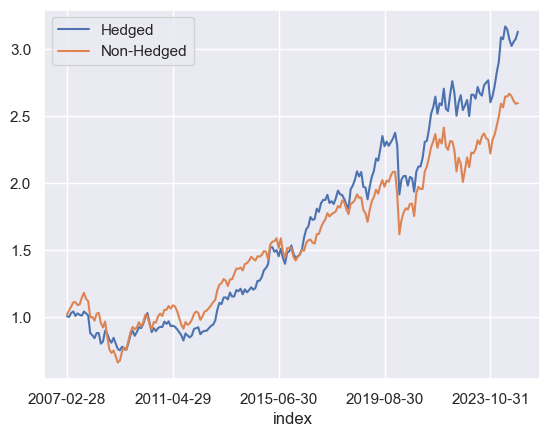

In [215]:
df_mv_hedged['cumprod_mv_return'] = (1 + df_mv_hedged['mv_return']).cumprod()
df_mv_non_hedged['cumprod_mv_return'] = (1 + df_mv_non_hedged['mv_return']).cumprod()

df_mv_hedged['cumprod_mv_return'].plot()
df_mv_non_hedged['cumprod_mv_return'].plot()
plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [216]:
sharpe_mv_hedged = compute_sharpe_ratio(df_mv_hedged['mv_return'], df_mv_hedged['rf_US'])
sharpe_mv_non_hedged = compute_sharpe_ratio(df_mv_non_hedged['mv_return'], df_mv_non_hedged['rf_US'])

print(f'The Sharpe ratio of the hedged MV strategy is : {sharpe_mv_hedged}')
print(f'The mean of returns is : {df_mv_hedged["mv_return"].mean()}')
print(f'The std of returns is : {df_mv_hedged["mv_return"].std()}')
print('--'*20)
print(f'The Sharpe ratio of the non hedged MV strategy is : {sharpe_mv_non_hedged}')
print(f'The mean of returns is : {df_mv_non_hedged["mv_return"].mean()}')
print(f'The std of returns is : {df_mv_non_hedged["mv_return"].std()}')

The Sharpe ratio of the hedged MV strategy is : 2.1643821197616644
The mean of returns is : 0.006024456927613119
The std of returns is : 0.03657166969964319
----------------------------------------
The Sharpe ratio of the non hedged MV strategy is : 1.7614111403333834
The mean of returns is : 0.005175111903731181
The std of returns is : 0.037283818763867035


## 4 Equity Index Momentum Strategy (MOM)

(a) 
Construct the return to a long-short momentum strategy portfolio. To that effect every month sort currency hedged stock indexes based on their 1-month lagged 11-month return (that is in month trank stocks based on their t− 12 to t− 1 cumulative return). Call Rankit the corresponding rank of index i at time t (e.g., Rankit = 2 if country i has the second lowest Currency-hedged return over the last year.)
Then compute monthly returns to a portfolio that invests in index i the weight
  wit = Z(Ranki−(N + 1)/2 )
for all i= 1,...,N, and where N is the total number of stock indexes traded and Z is a factor that insures that the the sum of the long positions is +$1 and the sum of the short positons is−$1.

In [217]:
# Load the dataset and set 'date' as the index
df = pd.read_csv("merged_all_data.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Define the list of countries and prefix for currency-hedged returns
countries = ['AUSTRALIA', 'SWITZERLAND', 'GERMANY', 'FRANCE', 'UNITED KINGDOM', 'JAPAN']
prefix = 'mportretx_'  # monthly portfolio returns, currency-hedged

# Create a DataFrame to store momentum signals
momentum = pd.DataFrame(index=df.index)

# Compute past 11-month cumulative log-returns for each country
for country in countries:
    col = prefix + country
    log_ret = np.log(1 + df[col])
    momentum[country] = log_ret.rolling(window=11, min_periods=11).sum().shift(1)  # t−12 to t−1 returns

# Rank countries each month based on their momentum
ranks = momentum.rank(axis=1, method='first')

# Compute ranking weights for the long-short portfolio
N = len(countries)
Z = 8/N**2

weights = (ranks - (N + 1) / 2) * Z  # assigns positive weights to winners, negative to losers
# Extract return data and rename columns
returns = df[[prefix + c for c in countries]].copy()
returns.columns = countries

# Compute the return of the momentum strategy
MOM_return = (weights * returns).sum(axis=1)

MOM_return[weights.isnull().any(axis=1)] = np.nan

# save the momentum strategy returns to a CSV file
MOM_return.to_csv('momentum_strategy_returns.csv', header=True)

(b) Compute and compare the mean, standard deviation, and Sharpe ratios of the long
and short legs of the strategy as well as of the strategy itself. Test if the strategy has
an average return that is statistically significantly different from zero.

In [218]:
# Define long and short positions based on ranks
# Long: top 3 countries by momentum
# Short: bottom 3 countries by momentum
long_mask = ranks.apply(lambda row: row >= (N - 3 + 1), axis=1)
short_mask = ranks.apply(lambda row: row <= 3, axis=1)

# Compute average return of long and short legs
long_returns = (returns * long_mask).sum(axis=1) / long_mask.sum(axis=1)
short_returns = (returns * short_mask).sum(axis=1) / short_mask.sum(axis=1)

# Momentum strategy return (already computed before)
strategy_returns = MOM_return

import pandas as pd
import numpy as np
from scipy import stats

# Create a DataFrame to summarize mean, standard deviation, and Sharpe ratio
results = pd.DataFrame({
    "Mean": [long_returns.mean(), short_returns.mean(), strategy_returns.mean()],
    "Std": [long_returns.std(), short_returns.std(), strategy_returns.std()],
    "Sharpe": [
        long_returns.mean() / long_returns.std(),
        short_returns.mean() / short_returns.std(),
        strategy_returns.mean() / strategy_returns.std()
    ]
}, index=["Long", "Short", "Strategy"])

# Perform t-test to check if strategy return is significantly different from 0
t_stat, p_value = stats.ttest_1samp(strategy_returns.dropna(), popmean=0)
results["t-stat"] = [np.nan, np.nan, t_stat]
results["p-value"] = [np.nan, np.nan, p_value]

# Display result rounded to 4 decimal places
print(results.round(4))

                  Mean          Std        Sharpe        t-stat      p-value
Long      0.0034000000 0.0382000000  0.0892000000           NaN          NaN
Short     0.0053000000 0.0384000000  0.1372000000           NaN          NaN
Strategy -0.0024000000 0.0246000000 -0.0985000000 -1.6028000000 0.1102000000


(c) Regress the MOM strategy return on the DIV return. Interpret the regression results.
In particular, do you think that it is interesting for a DIV-investor to also invest in the
MOM strategy?

In [219]:
import statsmodels.api as sm

# Load the data of DIV strategy and set 'date' as the index
DIV_return = pd.read_csv("returns_rp_hedged.csv", parse_dates=['date'])
DIV_return.set_index('date', inplace=True)

import pandas as pd
import statsmodels.api as sm

# 1. Align the data based on the common time frame (intersection of both time series)
returns_df = pd.concat([MOM_return, DIV_return], axis=1, join='inner')
returns_df.columns = ['MOM', 'DIV']

# 2. Drop missing values to avoid bias in regression
returns_df = returns_df.dropna()

# 3. Set up the regression model: regress MOM returns on DIV returns
X = sm.add_constant(returns_df['DIV'])  # add intercept (constant term α)
y = returns_df['MOM']
model = sm.OLS(y, X).fit()

# 4. Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MOM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04319
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.836
Time:                        11:48:35   Log-Likelihood:                 487.73
No. Observations:                 213   AIC:                            -971.5
Df Residuals:                     211   BIC:                            -964.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.002     -1.294      0.1

## 5 Equity Index Long Term Reversal strategy (REV)


(a) 
Construct the return to a long-short reversal strategy portfolio. To that effect every month sort currency hedged stock indexes based on their 12-month lagged 5-year past return (that is in month t rank stocks based on their t−60 to t−12 cumulative return). Call Rankit the corresponding rank of index i at time t.
Then compute monthly returns to a portfolio that invests in index i the weight: wit = Z ((N + 1)/2 − Ranki) for all i = 1, . . . , N, and where N is the total number of stock indexes traded and Z is a factor that insures that the the sum of the long positions is +$1 and the sum of the short positons is −$1.

In [220]:
# Load the dataset and set 'date' as the index
df = pd.read_csv("merged_all_data.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Define the list of countries and prefix for currency-hedged returns
countries = ['AUSTRALIA', 'SWITZERLAND', 'GERMANY', 'FRANCE', 'UNITED KINGDOM', 'JAPAN']
prefix = 'mportretx_'  # monthly portfolio returns

# Create a DataFrame for long-term reversal signals
rev_signal = pd.DataFrame(index=df.index)

# Compute past t−60 to t−12 cumulative log-returns
for country in countries:
    col = prefix + country
    log_ret = np.log(1 + df[col])
    rev_signal[country] = log_ret.rolling(window=49, min_periods=49).sum().shift(12)  # t−60 to t−12 returns

# Rank countries each month based on reversal signal
rev_ranks = rev_signal.rank(axis=1, method='first')

# Compute ranking weights for the long-short reversal portfolio
N = len(countries)
Z = 8/N/N
rev_weights = ((N + 1)/2 - rev_ranks) * Z  # reversal: long past losers, short past winners
print(rev_weights)
# Extract returns8^1
returns = df[[prefix + c for c in countries]].copy()
returns.columns = countries

# Compute REV strategy return
REV_return = (rev_weights * returns).sum(axis=1)

REV_return[rev_weights.isnull().any(axis=1)] = np.nan

# Save the REV strategy returns to a CSV file
REV_return.to_csv('reversal_strategy_returns.csv', header=True)

               AUSTRALIA  SWITZERLAND       GERMANY        FRANCE  \
date                                                                
2002-01-31           NaN          NaN           NaN           NaN   
2002-02-28           NaN          NaN           NaN           NaN   
2002-03-28           NaN          NaN           NaN           NaN   
2002-04-30           NaN          NaN           NaN           NaN   
2002-05-31           NaN          NaN           NaN           NaN   
...                  ...          ...           ...           ...   
2024-08-30  0.3333333333 0.1111111111 -0.1111111111 -0.3333333333   
2024-09-30  0.3333333333 0.1111111111 -0.1111111111 -0.3333333333   
2024-10-31  0.1111111111 0.3333333333 -0.1111111111 -0.3333333333   
2024-11-29  0.1111111111 0.3333333333 -0.1111111111 -0.3333333333   
2024-12-31 -0.1111111111 0.3333333333  0.1111111111 -0.3333333333   

            UNITED KINGDOM         JAPAN  
date                                      
2002-01-31      

In [221]:
print(REV_return.tail(13))

date
2023-12-29   -0.0126949626
2024-01-31   -0.0400019613
2024-02-29   -0.0264148249
2024-03-28    0.0048904991
2024-04-30    0.0231077044
2024-05-31    0.0172336229
2024-06-28    0.0061789382
2024-07-31    0.0334270815
2024-08-30    0.0075609898
2024-09-30    0.0037556191
2024-10-31   -0.0118468172
2024-11-29    0.0247660495
2024-12-31   -0.0386522868
dtype: float64


(b) Compute and compare the mean, standard deviation, and Sharpe ratios of the long
and short legs of the strategy as well as of the strategy itself. Test if the strategy has
an average return that is statistically significantly different from zero.

In [222]:
# Define long and short positions based on ranks
long_mask_rev = rev_ranks.apply(lambda row: row <= 3, axis=1)
short_mask_rev = rev_ranks.apply(lambda row: row >= (N -3 + 1), axis=1)

# Compute average return of long and short legs
long_returns_rev = (returns * long_mask_rev).sum(axis=1) / long_mask_rev.sum(axis=1)
short_returns_rev = (returns * short_mask_rev).sum(axis=1) / short_mask_rev.sum(axis=1)

# Summary statistics
rev_results = pd.DataFrame({
    "Mean": [long_returns_rev.mean(), short_returns_rev.mean(), REV_return.mean()],
    "Std": [long_returns_rev.std(), short_returns_rev.std(), REV_return.std()],
    "Sharpe": [
        long_returns_rev.mean() / long_returns_rev.std(),
        short_returns_rev.mean() / short_returns_rev.std(),
        REV_return.mean() / REV_return.std()
    ]
}, index=["Long", "Short", "Strategy"])

# T-test for significance
t_stat, p_value = stats.ttest_1samp(REV_return.dropna(), popmean=0)
rev_results["t-stat"] = [np.nan, np.nan, t_stat]
rev_results["p-value"] = [np.nan, np.nan, p_value]

# Display result rounded to 4 decimal places
print(rev_results.round(4))

                  Mean          Std        Sharpe        t-stat      p-value
Long      0.0023000000 0.0393000000  0.0579000000           NaN          NaN
Short     0.0028000000 0.0398000000  0.0693000000           NaN          NaN
Strategy -0.0007000000 0.0229000000 -0.0311000000 -0.4574000000 0.6478000000


(c) Regress the REV strategy return on the DIV return. Interpret the regression results.
In particular, do you think that it is interesting for a DIV-investor to also invest in the
REV strategy?

In [223]:
import statsmodels.api as sm
import pandas as pd

# Load DIV strategy returns
DIV_return = pd.read_csv("returns_rp_hedged.csv", parse_dates=['date'])
DIV_return.set_index('date', inplace=True)

# Align common time frame 
returns_df = pd.concat([REV_return, DIV_return], axis=1, join='inner')
returns_df.columns = ['REV', 'DIV']

# Delete missing values
returns_df = returns_df.dropna()

# Regression
X = sm.add_constant(returns_df['DIV'])  # add intercept
y = returns_df['REV']
model = sm.OLS(y, X).fit()

# print
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.875
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.172
Time:                        11:48:35   Log-Likelihood:                 503.52
No. Observations:                 213   AIC:                            -1003.
Df Residuals:                     211   BIC:                            -996.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.288e-05      0.002     -0.046      0.9

## Part 6: Currency Carry Strategy Analysis

### (a) 1. Setup and Data Loading

In [224]:
pd.set_option('display.float_format', lambda x: f'{x:.10f}')

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [225]:
# Load the dataset
df = pd.read_csv('merged_all_data.csv', index_col=0)

# Drop unnecessary columns (fic: Fama French Industry Classification, currency: currency denomination of stock prices)
df = df.drop(columns={col for col in df.columns if col.startswith(('fic', 'currency'))})

print("Original DataFrame head:")
df.head()

Original DataFrame head:


,mportret_AUSTRALIA,mportretx_AUSTRALIA,mportret_SWITZERLAND,mportretx_SWITZERLAND,mportret_GERMANY,mportretx_GERMANY,mportret_FRANCE,mportretx_FRANCE,mportret_UNITED KINGDOM,mportretx_UNITED KINGDOM,mportret_JAPAN,mportretx_JAPAN,rm_US,rf_US,fx_USUK,fx_SZUS,fx_JPUS,fx_USAL,fx_USEU,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,1.6709000000,132.6833000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,1.6970000000,133.6426000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,1.6743000000,131.0610000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,1.6542000000,130.7718000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,1.5889000000,126.3750000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000


### 2. Data Preparation for Carry Strategy

#### 2.1. Adjust FX Rates

In [226]:
# Convert FX rates to USD perspective (e.g., USD per CHF, USD per JPY)
df['fx_USSZ'] = 1 / df['fx_SZUS'] # USD per CHF
df['fx_USJP'] = 1 / df['fx_JPUS'] # USD per JPY

# Drop original columns for Swiss Franc and Japanese Yen FX rates against USD
df = df.drop(columns=['fx_SZUS', 'fx_JPUS'])

print("DataFrame head after FX rate adjustment:")
df.head()

DataFrame head after FX rate adjustment:


,mportret_AUSTRALIA,mportretx_AUSTRALIA,mportret_SWITZERLAND,mportretx_SWITZERLAND,mportret_GERMANY,mportretx_GERMANY,mportret_FRANCE,mportretx_FRANCE,mportret_UNITED KINGDOM,mportretx_UNITED KINGDOM,mportret_JAPAN,mportretx_JAPAN,rm_US,rf_US,fx_USUK,fx_USAL,fx_USEU,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_USSZ,fx_USJP
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.8200000000,4.8400000000,0.0800000000,4.1537000000,0.6293662282,0.0079129575


#### 2.2. Calculate Monthly Interest Rates

In [227]:
# Define original interest rate column names
INTERBANK_RATE_COLS = {
    'AUD': 'australia_interbank', # Australia interbank rate
    'EUR': 'euro_interbank',      # Euro interbank rate
    'JPY': 'japan_interbank',     # Japan interbank rate
    'CHF': 'ch_interbank',        # Switzerland interbank rate
    'GBP': 'uk_interbank',        # UK interbank rate
    'USD': 'rf_US'                # US risk-free rate (assumed to be monthly)
}
CURRENCIES = ['USD', 'AUD', 'EUR', 'JPY', 'CHF', 'GBP']

# DataFrame to store monthly interest rates
df_rates_monthly = pd.DataFrame(index=df.index)

for currency in CURRENCIES:
    rate_col_original_name = INTERBANK_RATE_COLS[currency]
    target_col_name = f'rf_{currency}_monthly'

    if currency == 'USD':
        # rf_US is assumed to be already a monthly decimal return, no conversion needed
        df_rates_monthly[target_col_name] = pd.to_numeric(df[rate_col_original_name], errors='coerce')
    else:
        # Other interbank rates are assumed to be in annual percentage terms, convert to monthly decimal return
        df_rates_monthly[target_col_name] = pd.to_numeric(df[rate_col_original_name], errors='coerce') / (100 * 12)

print("Monthly interest rates (df_rates_monthly) head:")
df_rates_monthly.head()

Monthly interest rates (df_rates_monthly) head:


,rf_USD_monthly,rf_AUD_monthly,rf_EUR_monthly,rf_JPY_monthly,rf_CHF_monthly,rf_GBP_monthly
date,,,,,,
2002-01-31,0.0014079107,0.0035500000,0.0027823106,NaN,0.0013364376,0.0033723083
2002-02-28,0.0014438782,0.0035916667,0.0027975833,NaN,0.0013055588,0.0033772333
2002-03-28,0.0014248364,0.0037166667,0.0028256667,NaN,0.0013368031,0.0034421250
2002-04-30,0.0014606291,0.0038250000,0.0028390873,0.0000833333,0.0012172055,0.0034776583
2002-05-31,0.0014079107,0.0040333333,0.0028892803,0.0000666667,0.0009695782,0.0034614167


### 3. Construct Carry Strategy Portfolio

#### 3.1. Calculate Carry Signals and Ranks

In [228]:
# Define currencies for carry trade (excluding USD as it's the base)
CURRENCIES_CARRY = ['AUD', 'EUR', 'JPY', 'CHF', 'GBP']

# Calculate carry signals (foreign interest rate - US interest rate)
carry_signals_df = pd.DataFrame(index=df_rates_monthly.index)
for currency in CURRENCIES_CARRY:
    carry_signals_df[currency] = df_rates_monthly[f'rf_{currency}_monthly'] - df_rates_monthly['rf_USD_monthly']

# Rank currencies based on carry signals (lower rank for lower carry, higher for higher carry)
ranks_df = carry_signals_df.rank(axis=1, method='first', ascending=True, na_option='keep')

print("Carry Signals (carry_signals_df) head:")
display(carry_signals_df.head())
print("\nRanks based on Carry (ranks_df) head:")
display(ranks_df.head())

Carry Signals (carry_signals_df) head:


,AUD,EUR,JPY,CHF,GBP
date,,,,,
2002-01-31,0.0021420893,0.0013743999,NaN,-0.0000714730,0.0019643977
2002-02-28,0.0021477885,0.0013537051,NaN,-0.0001383194,0.0019333551
2002-03-28,0.0022918303,0.0014008303,NaN,-0.0000880333,0.0020172886
2002-04-30,0.0023643709,0.0013784582,-0.0013772958,-0.0002434236,0.0020170292
2002-05-31,0.0026254227,0.0014813696,-0.0013412440,-0.0004383324,0.0020535060



Ranks based on Carry (ranks_df) head:


,AUD,EUR,JPY,CHF,GBP
date,,,,,
2002-01-31,4.0000000000,2.0000000000,NaN,1.0000000000,3.0000000000
2002-02-28,4.0000000000,2.0000000000,NaN,1.0000000000,3.0000000000
2002-03-28,4.0000000000,2.0000000000,NaN,1.0000000000,3.0000000000
2002-04-30,5.0000000000,3.0000000000,1.0000000000,2.0000000000,4.0000000000
2002-05-31,5.0000000000,3.0000000000,1.0000000000,2.0000000000,4.0000000000


#### 3.2. Calculate Portfolio Weights

In [229]:
# Calculate portfolio weights based on ranks
weights_df = pd.DataFrame(index=ranks_df.index, columns=ranks_df.columns, dtype=float)

for date_index, rank_series_for_date in ranks_df.iterrows():
    valid_ranks = rank_series_for_date.dropna()  # Non-NaN ranks for the current date
    N_effective = len(valid_ranks)               # Number of effectively ranked currencies

    # Strategy requires at least one currency to long and one to short
    if N_effective < 2:
        weights_df.loc[date_index] = np.nan
        continue

    # Calculate normalization factor Z_effective
    Z_effective = 0.0
    if N_effective > 1:
        if N_effective % 2 == 1:  # Odd N_effective
            Z_effective = 8 / (N_effective**2 - 1)
        else:  # Even N_effective
            Z_effective = 8 / (N_effective**2)
    
    # Calculate weights: w_i,t = Z_effective * (rank_i,t - (N_t + 1)/2)
    calculated_weights_for_date = (valid_ranks - (N_effective + 1) / 2) * Z_effective
    weights_df.loc[date_index, valid_ranks.index] = calculated_weights_for_date

print("Portfolio Weights (weights_df) head:")
weights_df.head()

Portfolio Weights (weights_df) head:


,AUD,EUR,JPY,CHF,GBP
date,,,,,
2002-01-31,0.7500000000,-0.2500000000,NaN,-0.7500000000,0.2500000000
2002-02-28,0.7500000000,-0.2500000000,NaN,-0.7500000000,0.2500000000
2002-03-28,0.7500000000,-0.2500000000,NaN,-0.7500000000,0.2500000000
2002-04-30,0.6666666667,0.0000000000,-0.6666666667,-0.3333333333,0.3333333333
2002-05-31,0.6666666667,0.0000000000,-0.6666666667,-0.3333333333,0.3333333333


#### 3.3. Calculate Currency Excess Returns(X_{t+1})

In [230]:
# Define FX rate column names in the main DataFrame 'df'
FX_COLS = {
    'AUD': 'fx_USAL', # USD per AUD
    'EUR': 'fx_USEU', # USD per EUR
    'JPY': 'fx_USJP', # USD per JPY
    'CHF': 'fx_USSZ', # USD per CHF
    'GBP': 'fx_USUK'  # USD per GBP
}

# Define monthly foreign risk-free rate column names from 'df_rates_monthly'
FOREIGN_RF_COLS_MONTHLY = {
    'AUD': 'rf_AUD_monthly',
    'EUR': 'rf_EUR_monthly',
    'JPY': 'rf_JPY_monthly',
    'CHF': 'rf_CHF_monthly',
    'GBP': 'rf_GBP_monthly'
}
DOMESTIC_RF_COL_MONTHLY = 'rf_USD_monthly' # Domestic (US) risk-free rate column name in 'df_rates_monthly'

# Calculate S_{t+1}/S_t (FX rate change)
S_df_for_X = pd.DataFrame(index=df.index)
for currency_code_map, fx_col_name in FX_COLS.items():
    S_df_for_X[currency_code_map] = df[fx_col_name]

S_t_plus_1_over_S_t = S_df_for_X[CURRENCIES_CARRY].shift(-1) / S_df_for_X[CURRENCIES_CARRY]
S_t_plus_1_over_S_t.columns = [f'S_ratio_{col}' for col in CURRENCIES_CARRY]

# DataFrame to store Currency Excess Returns X_{i, t+1} (calculated at t, for period t to t+1)
X_df = pd.DataFrame(index=df_rates_monthly.index)

for currency_code in CURRENCIES_CARRY:
    s_ratio = S_t_plus_1_over_S_t[f'S_ratio_{currency_code}']  # S_{t+1}/S_t at index t
    r_f_t = df_rates_monthly[FOREIGN_RF_COLS_MONTHLY[currency_code]]  # Foreign rate at time t
    r_d_t = df_rates_monthly[DOMESTIC_RF_COL_MONTHLY]                  # Domestic rate at time t

    # X_{i, t+1} = (S_{i, t+1}/S_i,t) * (1 + r_{f,i,t}) - (1 + r_{d,t})
    # Align s_ratio's index with X_df's index for calculation
    s_ratio_aligned = s_ratio.reindex(X_df.index)
    
    X_df[f'{currency_code}'] = s_ratio_aligned * (1 + r_f_t) - (1 + r_d_t)

print("Currency Excess Returns (X_df) head:")
#X_df.head()
X_df.tail()

Currency Excess Returns (X_df) head:


,AUD,EUR,JPY,CHF,GBP
date,,,,,
2024-08-30,0.0161529070,0.0062210036,0.0189920601,0.0091494297,0.0209643851
2024-09-30,-0.0105207818,-0.0198407718,-0.0499024967,-0.0193590575,-0.0131608325
2024-10-31,-0.0258429679,-0.0263286578,-0.0284065867,-0.0252731293,-0.0232704026
2024-11-29,-0.0296192187,-0.0150332800,-0.0038346727,-0.0148118259,-0.0067467932
2024-12-31,NaN,NaN,NaN,NaN,NaN


#### 3.4. Calculate Carry Strategy Returns

In [231]:
# Clean and align weights and excess returns for final calculation
weights_df_cleaned = weights_df.dropna(how='all').copy()
X_df_cleaned = X_df.dropna(how='all').copy()


# Fill any remaining NaNs (e.g., from currencies not included in a specific month's ranking) with 0 for dot product
weights_df_cleaned.fillna(0, inplace=True)
X_df_cleaned.fillna(0, inplace=True) # Note: X_df's last row will be all NaN (due to S_{t+1}), then 0. This is handled by common_index.


# Ensure both DataFrames use a common index (excluding the last month where X_df is NaN)
common_index_final = weights_df_cleaned.index.intersection(X_df_cleaned.index)
weights_final_aligned = weights_df_cleaned.loc[common_index_final]
X_final_aligned = X_df_cleaned.loc[common_index_final]

# Calculate carry strategy returns: R_carry,t+1 = sum(w_i,t * X_i,t+1)
carry_returns_series = (X_final_aligned * weights_final_aligned).sum(axis=1)
df["carry_returns"] = carry_returns_series # Add to the main DataFrame

print("Carry Strategy Returns (in main df) head:")
print(df["carry_returns"].head())
# Save the carry strategy returns to a CSV file
df["carry_returns"].to_csv("carry_strategy_returns.csv")

Carry Strategy Returns (in main df) head:
date
2002-01-31    0.0091279103
2002-02-28    0.0088198930
2002-03-28    0.0073829884
2002-04-30   -0.0114906823
2002-05-31    0.0040555370
Name: carry_returns, dtype: float64


### Part b:  Performance Analysis

In [232]:
N_CURRENCIES_STAT = len(CURRENCIES_CARRY) #5

common_index = ranks_df.index.intersection(X_df.index) 
ranks_aligned = ranks_df.loc[common_index, CURRENCIES_CARRY]
X_aligned = X_df.loc[common_index, [f'{currency}' for currency in CURRENCIES_CARRY]]
X_aligned.columns = CURRENCIES_CARRY # Rename columns for easier masking (e.g., 'X_AUD' to 'AUD')

# Determine Long and Short Groups based on Ranks
num_in_leg = (N_CURRENCIES_STAT - 1) // 2 if N_CURRENCIES_STAT % 2 == 1 else N_CURRENCIES_STAT // 2 -1

long_mask = ranks_aligned > (N_CURRENCIES_STAT - num_in_leg)
short_mask = ranks_aligned <= num_in_leg

# Compute average return of long and short legs
# np.where applies the mask; np.nanmean calculates mean ignoring NaNs
long_returns = pd.Series(np.nanmean(np.where(long_mask, X_aligned, np.nan), axis=1), index=X_aligned.index)
short_returns = pd.Series(np.nanmean(np.where(short_mask, X_aligned, np.nan), axis=1), index=X_aligned.index)

# Get strategy returns from the main DataFrame, aligned with legs
strategy_returns_aligned = df["carry_returns"].loc[common_index]

# Combine into a DataFrame for statistical analysis
long_short_strategy_returns = pd.concat([
    long_returns,
    short_returns,
    strategy_returns_aligned
], axis=1, keys=['Long_Leg_Return', 'Short_Leg_Return', 'CARRY_Strategy_Return'])

# Align risk-free rate (rf_USD_monthly from df_rates_monthly) for Sharpe ratio calculation
rf = df_rates_monthly[DOMESTIC_RF_COL_MONTHLY]

long_short_strategy_returns

C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\2707670851.py:16: RuntimeWarning: Mean of empty slice
  long_returns = pd.Series(np.nanmean(np.where(long_mask, X_aligned, np.nan), axis=1), index=X_aligned.index)
C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\2707670851.py:17: RuntimeWarning: Mean of empty slice
  short_returns = pd.Series(np.nanmean(np.where(short_mask, X_aligned, np.nan), axis=1), index=X_aligned.index)


,Long_Leg_Return,Short_Leg_Return,CARRY_Strategy_Return
date,,,
2002-01-31,-0.0060105412,-0.0141450841,0.0091279103
2002-02-28,0.0271984385,0.0107930526,0.0088198930
2002-03-28,0.0206245548,0.0121167391,0.0073829884
2002-04-30,0.0217592607,0.0371607551,-0.0114906823
2002-05-31,0.0273547013,0.0275456700,0.0040555370
...,...,...,...
2024-08-30,0.0185586460,0.0140707449,0.0036493758
2024-09-30,-0.0118408072,-0.0346307771,0.0274405347
2024-10-31,-0.0245566852,-0.0268398580,0.0032341765


In [233]:

# Mean & Std of the return
mean_returns = long_short_strategy_returns.mean()
std_dev = long_short_strategy_returns.std()

#Sharpe ratio
excess_returns = long_short_strategy_returns.subtract(rf, axis=0)
sharpe_ratios = excess_returns.mean() / std_dev

results_b_df = pd.DataFrame({
    "Mean Return": mean_returns,
    "Std Dev": std_dev,
    "Sharpe Ratio": sharpe_ratios
})

# T-test for the CARRY strategy's average monthly return (use non-annualized monthly returns)
t_stat, p_value = stats.ttest_1samp(long_short_strategy_returns["CARRY_Strategy_Return"].dropna(), 0)
results_b_df.loc["CARRY_Strategy_Return", "T-statistic"] = t_stat
results_b_df.loc["CARRY_Strategy_Return", "P-value"] = p_value

print("\n--- Performance Statistics (Part b) ---")
results_b_df


--- Performance Statistics (Part b) ---


,Mean Return,Std Dev,Sharpe Ratio,T-statistic,P-value
Long_Leg_Return,0.0017516783,0.0216821429,0.0232467223,NaN,NaN
Short_Leg_Return,0.0005170537,0.0192415619,-0.0379691592,NaN,NaN
CARRY_Strategy_Return,0.0015825247,0.0220952389,0.0151564394,1.1877311587,0.2359679150


#### Return Visualization

<Figure size 1200x600 with 0 Axes>

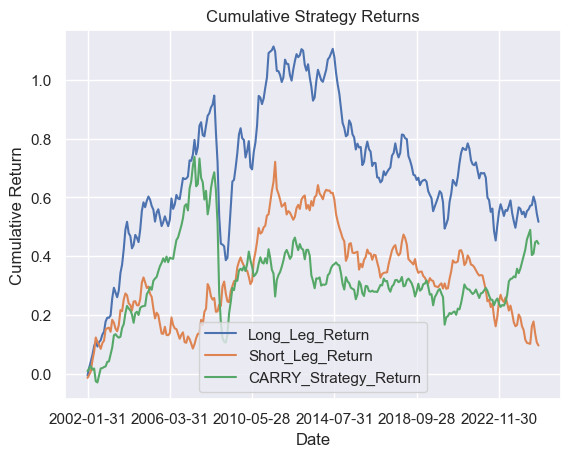

In [234]:
# Example: Plot cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
cumulative_returns = (1 + long_short_strategy_returns).cumprod() -1
cumulative_returns.plot(title='Cumulative Strategy Returns')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.grid(True)
plt.show()


### (c) Regression

In [235]:
import pandas as pd
import statsmodels.api as sm

# Load the data of DIV strategy and set 'date' as the index
DIV_return = pd.read_csv("returns_rp_hedged.csv", parse_dates=['date'])
DIV_return.set_index('date', inplace=True)

#Set carry strategy df
CARRY_return =  long_short_strategy_returns.drop(['Long_Leg_Return','Short_Leg_Return'], axis=1)
CARRY_return.index = pd.to_datetime(CARRY_return.index)

#Arrange the datetime
CARRY_return.index = CARRY_return.index + pd.offsets.MonthEnd(0)
DIV_return.index = DIV_return.index + pd.offsets.MonthEnd(0)

#Merge
returns_df = pd.concat([CARRY_return, DIV_return], axis=1, join='inner')
returns_df.columns = ['CARRY', 'DIV']

#Drop missing values to avoid bias in regression
returns_df = returns_df.dropna()

# Set up the regression model: regress MOM returns on DIV returns
X = sm.add_constant(returns_df['DIV'])  # add intercept (constant term α)
y = returns_df['CARRY']
model = sm.OLS(y, X).fit()

# 4. Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  CARRY   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.177
Date:                Sun, 15 Jun 2025   Prob (F-statistic):             0.0137
Time:                        11:48:36   Log-Likelihood:                 499.16
No. Observations:                 213   AIC:                            -994.3
Df Residuals:                     211   BIC:                            -987.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.428      0.6

## **(7) Currency Dollar Strategy**

### **(a)** computing the returns of the dollar strategy

In [236]:
df = pd.read_csv('merged_all_data.csv', index_col=0)

df = df.drop(columns={col for col in df.columns if col.startswith(('fic', 'currency'))})
mapping = {
    'AUSTRALIA' : 'AUS',
    'SWITZERLAND' : 'CHE',
    'GERMANY' : 'DEU',
    'FRANCE' : 'FRA',
    'UNITED KINGDOM' : 'UK',
    'JAPAN' : 'JPN'
}
columns_to_rename = {col for col in df.columns if col.split('_')[-1] in mapping.keys()}

df = df.rename(columns={col: col.replace(col.split('_')[1], mapping[col.split('_')[1]]) for col in columns_to_rename})


df['fx_USSZ'] = 1 / df['fx_SZUS']
df['fx_USJP'] = 1 / df['fx_JPUS']

df = df.drop(columns=['fx_SZUS', 'fx_JPUS'])


mapping_fx_columns = {
    'fx_USUK' : 'fx_US_UK',
    'fx_USAL' : 'fx_US_AL',
    'fx_USEU' : 'fx_US_EUR',
    'fx_USSZ' : 'fx_US_CHF',
    'fx_USJP' : 'fx_US_JPY'
}

fx_columns = [col for col in df.columns if col.startswith('fx_')]

df = df.rename(columns={col: mapping_fx_columns[col] for col in fx_columns if col in fx_columns})

fx_columns = [ col for col in df.columns if col.startswith('fx_') and not col.endswith('_ret') ]

for fx_col in fx_columns:
    df[f'{fx_col}_ret'] = df[fx_col].pct_change()
    df[f'{fx_col}_ret'] = df[f'{fx_col}_ret'].shift(-1)


fx_mapping = {
    'AUS': 'fx_US_AL_ret',
    'CHE': 'fx_US_CHF_ret',
    'DEU': 'fx_US_EUR_ret',
    'FRA': 'fx_US_EUR_ret',
    'UK': 'fx_US_UK_ret',
    'JPN': 'fx_US_JPY_ret'
}

for col in [col for col in df.columns if col.startswith('mportret_')]:
    
    df[f'{col}_us_adjusted'] = df[col] * ( 1 + df[fx_mapping[col.split('_')[1]]])


interbank_mapping = {
    'uk' : 'UK_interbank',
    'japan': 'JPY_interbank', 
    'ch' : 'CHF_interbank',
    'us' : 'US_interbank',
    'australia': 'AUD_interbank',
    'euro' : 'EUR_interbank'
}

df = df.rename(columns={col: interbank_mapping[col.split('_')[0]] for col in df.columns if col.endswith('interbank')})

for col in [col for col in df.columns if col.endswith('interbank')]:
    
    df[f"rf_{col.split('_')[0]}_monthly"] = df[col] / 12 / 100


hedging_mapping = {
    'fx_US_CHF_ret': 'rf_CHF_monthly',
    'fx_US_JPY_ret': 'rf_JPY_monthly',
    'fx_US_UK_ret': 'rf_UK_monthly',
    'fx_US_AL_ret': 'rf_AUD_monthly',
    'fx_US_EUR_ret': 'rf_EUR_monthly',
}

columns_hedging = [col for col in hedging_mapping.keys()]

for col in columns_hedging:
    df[f'{col}_hedging'] = (1 + df[col]) * ( 1 + df[hedging_mapping[col]]) - ( 1 + df['rf_US'] )

mapping_currency_hedged = { 
    'mportret_AUS_us_adjusted': 'fx_US_AL_ret_hedging',
    'mportret_CHE_us_adjusted': 'fx_US_CHF_ret_hedging',
    'mportret_DEU_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_FRA_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_UK_us_adjusted': 'fx_US_UK_ret_hedging',
    'mportret_JPN_us_adjusted': 'fx_US_JPY_ret_hedging'
}

for col in mapping_currency_hedged.keys():
    df[f'{col}_hedged'] = df[col] - df[mapping_currency_hedged[col]]


In [237]:
df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,EUR_interbank,CHF_interbank,US_interbank,AUD_interbank,JPY_interbank,UK_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_EUR_monthly,rf_CHF_monthly,rf_US_monthly,rf_AUD_monthly,rf_JPY_monthly,rf_UK_monthly,fx_US_CHF_ret_hedging,fx_US_JPY_ret_hedging,fx_US_UK_ret_hedging,fx_US_AL_ret_hedging,fx_US_EUR_ret_hedging,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.0273578567,0.0273132504,-0.0221262830,-0.0221460495,0.0122772449,0.0114909316,-0.0271048471,-0.0273056737,-0.0108660983,-0.0117199174,-0.0566551494,-0.0567096311,-0.0159660000,0.0014079107,1.4322000000,0.5170000000,0.8832000000,3.3387727273,1.6037251429,1.7400000000,4.2600000000,NaN,4.0467700000,0.5984798612,0.0075367435,-0.0066331518,-0.0081237911,-0.0141530797,-0.0153800825,-0.0071781004,0.0271356072,-0.0217859789,0.0121034841,-0.0267212300,-0.0107940219,-0.0562484730,0.0027823106,0.0013364376,0.0014500000,0.0035500000,NaN,0.0033723083,-0.0154721101,NaN,-0.0046911232,-0.0060105412,-0.0128180580,0.0331461484,-0.0063138688,0.0249215421,-0.0139031720,-0.0061028987,NaN
2002-02-28,-0.0018319390,-0.0043578687,0.0116607107,0.0116456861,-0.0088072175,-0.0088160069,-0.0043939683,-0.0044474921,-0.0033406566,-0.0070717255,0.0422556653,0.0419976718,-0.0217000000,0.0014438782,1.4227000000,0.5128000000,0.8707000000,3.3571000000,1.5666706000,1.8200000000,4.3100000000,NaN,4.0526800000,0.5892751915,0.0074826440,0.0002108667,0.0249609984,0.0067761571,0.0135579048,0.0196976980,-0.0018776660,0.0118188055,-0.0088668966,-0.0044237425,-0.0033413611,0.0430880046,0.0027975833,0.0013055588,0.0015166667,0.0035916667,NaN,0.0033772333,0.0134372861,NaN,0.0021449339,0.0271984385,0.0081488191,-0.0290761045,-0.0016184806,-0.0170157157,-0.0125725616,-0.0054862950,NaN
2002-03-28,0.0051988097,-0.0019141565,0.0487594286,0.0455697800,0.0493281250,0.0484695259,0.0520810150,0.0519427042,0.0389300664,0.0336609706,0.0531190903,0.0482940937,0.0446980000,0.0014248364,1.4230000000,0.5256000000,0.8766000000,3.3908000000,1.6041637500,1.9100000000,4.4600000000,NaN,4.1305500000,0.5972645285,0.0076300349,0.0139845397,0.0182648402,0.0107232489,0.0121508886,0.0022114860,0.0052937651,0.0493518990,0.0498570827,0.0526394927,0.0394744855,0.0532365625,0.0028256667,0.0013368031,0.0015916667,0.0037166667,NaN,0.0034421250,0.0120790987,NaN,0.0160499649,0.0206245548,0.0121543795,-0.0153307897,0.0372728002,0.0377027032,0.0404851132,0.0234245206,NaN
2002-04-30,-0.0143019767,-0.0154244722,-0.0041086009,-0.0079612276,-0.0450305093,-0.0470927763,-0.0439877142,-0.0457546292,-0.0133618832,-0.0154110309,0.0205859787,0.0205737687,-0.0496000000,0.0014606291,1.4429000000,0.5352000000,0.8860000000,3.4069047619,1.4606466190,1.8700000000,4.5900000000,0.1000000000,4.1731900000,0.6045218232,0.0076469086,0.0117125234,0.0272795217,0.0349887133,0.0410976147,0.0347916914,-0.0146921278,-0.0042774546,-0.0466060689,-0.0455267877,-0.0135183846,0.0213021997,0.0028390873,0.0012172055,0.0015583333,0.0038250000,0.0000833333,0.0034776583,0.0409042153,0.0334172949,0.0137702847,0.0297482367,0.0364665075,-0.0444403645,-0.0451816699,-0.0830725763,-0.0819932952,-0.0272886693,-0.0121150952
2002-05-31,-0.0002037861,-0.0017515748,0.0029628768,-0.0006387405,-0.0257027573,-0.0330684684,-0.0280161336,-0.0354866432,-0.0114824631,-0.0139372028,0.0359872785,0.0359202084,-0.0105100000,0.0014079107,1.4598000000,0.5498000000,0.9170000000,3.4671363636,1.1634939000,1.820000

In [238]:
columns_dollar_strat = [col for col in df.columns if col.startswith('fx_') and col.endswith('_hedging')]

df_dollar_strat = df[columns_dollar_strat]
df_dollar_strat['rf_US'] = df['rf_US']

df_dollar_strat.head()

C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\2143541223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dollar_strat['rf_US'] = df['rf_US']


,fx_US_CHF_ret_hedging,fx_US_JPY_ret_hedging,fx_US_UK_ret_hedging,fx_US_AL_ret_hedging,fx_US_EUR_ret_hedging,rf_US
date,,,,,,
2002-01-31,-0.0154721101,NaN,-0.0046911232,-0.0060105412,-0.0128180580,0.0014079107
2002-02-28,0.0134372861,NaN,0.0021449339,0.0271984385,0.0081488191,0.0014438782
2002-03-28,0.0120790987,NaN,0.0160499649,0.0206245548,0.0121543795,0.0014248364
2002-04-30,0.0409042153,0.0334172949,0.0137702847,0.0297482367,0.0364665075,0.0014606291
2002-05-31,0.0314127679,0.0236785721,0.0184822824,0.0362271203,0.0442436061,0.0014079107


In [239]:
df_dollar_strat['dollar_strat_ret'] = df_dollar_strat[columns_dollar_strat].mean(axis=1)

df_dollar_strat.head()

C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\4024952479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dollar_strat['dollar_strat_ret'] = df_dollar_strat[columns_dollar_strat].mean(axis=1)


,fx_US_CHF_ret_hedging,fx_US_JPY_ret_hedging,fx_US_UK_ret_hedging,fx_US_AL_ret_hedging,fx_US_EUR_ret_hedging,rf_US,dollar_strat_ret
date,,,,,,,
2002-01-31,-0.0154721101,NaN,-0.0046911232,-0.0060105412,-0.0128180580,0.0014079107,-0.0097479581
2002-02-28,0.0134372861,NaN,0.0021449339,0.0271984385,0.0081488191,0.0014438782,0.0127323694
2002-03-28,0.0120790987,NaN,0.0160499649,0.0206245548,0.0121543795,0.0014248364,0.0152269995
2002-04-30,0.0409042153,0.0334172949,0.0137702847,0.0297482367,0.0364665075,0.0014606291,0.0308613078
2002-05-31,0.0314127679,0.0236785721,0.0184822824,0.0362271203,0.0442436061,0.0014079107,0.0308088698


In [240]:
# Save the DataFrame with dollar strategy returns
df_dollar_strat['dollar_strat_ret'].to_csv('dollar_strategy_returns.csv')

In [241]:
df_dollar_strat['dollar_strat_cumprod'] = (df_dollar_strat['dollar_strat_ret'] + 1).cumprod()

df_dollar_strat.head()

C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\3152145359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dollar_strat['dollar_strat_cumprod'] = (df_dollar_strat['dollar_strat_ret'] + 1).cumprod()


,fx_US_CHF_ret_hedging,fx_US_JPY_ret_hedging,fx_US_UK_ret_hedging,fx_US_AL_ret_hedging,fx_US_EUR_ret_hedging,rf_US,dollar_strat_ret,dollar_strat_cumprod
date,,,,,,,,
2002-01-31,-0.0154721101,NaN,-0.0046911232,-0.0060105412,-0.0128180580,0.0014079107,-0.0097479581,0.9902520419
2002-02-28,0.0134372861,NaN,0.0021449339,0.0271984385,0.0081488191,0.0014438782,0.0127323694,1.0028602967
2002-03-28,0.0120790987,NaN,0.0160499649,0.0206245548,0.0121543795,0.0014248364,0.0152269995,1.0181308499
2002-04-30,0.0409042153,0.0334172949,0.0137702847,0.0297482367,0.0364665075,0.0014606291,0.0308613078,1.0495516995
2002-05-31,0.0314127679,0.0236785721,0.0184822824,0.0362271203,0.0442436061,0.0014079107,0.0308088698,1.0818872011


### **(b)** Sharpe and statistics

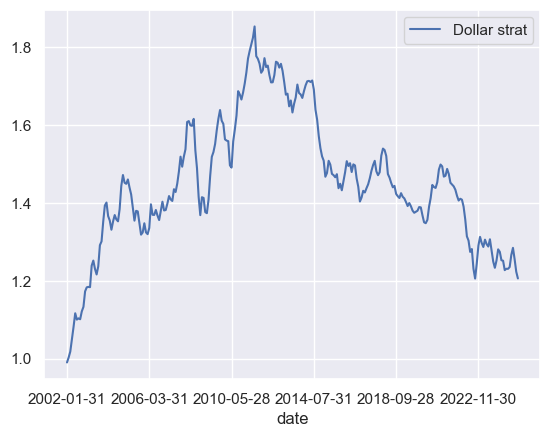

In [242]:
df_dollar_strat['dollar_strat_cumprod'].plot()

plt.legend(['Dollar strat'])
plt.show()

In [243]:
sharpe_dollar_strat = compute_sharpe_ratio( df_dollar_strat['dollar_strat_ret'], df_dollar_strat['rf_US'])

print(f'The Sharpe ratio of the dollar strategy is : {sharpe_dollar_strat}')
print(f'The mean of returns is : {df_dollar_strat["dollar_strat_ret"].mean()}')
print(f'The std of returns is : {df_dollar_strat["dollar_strat_ret"].std()}')


The Sharpe ratio of the dollar strategy is : -0.3695633885609658
The mean of returns is : 0.000836009452706871
The std of returns is : 0.017681474678803946


In [244]:
from scipy import stats

# Example: replace this with your actual returns series
returns = df_dollar_strat['dollar_strat_ret'].dropna().values

# One-sample t-test against 0
t_stat, p_value = stats.ttest_1samp(returns, 0)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the mean return is significantly different from 0.")
else:
    print("Fail to reject the null hypothesis: no significant evidence the mean return differs from 0.")


T-statistic: 0.7841
P-value: 0.4337
Fail to reject the null hypothesis: no significant evidence the mean return differs from 0.


### **(c)** Regression with the DIV returns

In [245]:
div_returns = pd.read_csv('returns_rp_hedged.csv', index_col=0)

div_returns.head()

,rp_return
date,
2007-03-30,0.0000000000
2007-04-30,0.0375115626
2007-05-31,0.0315467024
2007-06-29,-0.0248868875
2007-07-31,-0.0246509511


In [246]:
import statsmodels.api as sm

y = df_dollar_strat['dollar_strat_ret']

X_tamp = sm.add_constant(div_returns['rp_return'].reset_index())

X_tamp = X_tamp.merge(y.reset_index(), on='date', how='left').dropna()

X = X_tamp[['const', 'rp_return']]
y = X_tamp['dollar_strat_ret']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       dollar_strat_ret   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     10.29
Date:                Sun, 15 Jun 2025   Prob (F-statistic):            0.00154
Time:                        11:48:37   Log-Likelihood:                 571.39
No. Observations:                 213   AIC:                            -1139.
Df Residuals:                     211   BIC:                            -1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.407e-05      0.001      0.021      0.9

## part 8


In [247]:
import pandas as pd
import numpy as np

r_div = pd.read_csv('returns_rp_hedged.csv', index_col=0, parse_dates=True)
r_tbill = pd.read_csv('../wrds/risk_free_rate.csv', index_col=0, parse_dates=True)
r_carry = pd.read_csv('carry_strategy_returns.csv', index_col=0, parse_dates=True)
r_dollar = pd.read_csv('dollar_strategy_returns.csv', index_col=0, parse_dates=True)
r_reversal = pd.read_csv('reversal_strategy_returns.csv', index_col=0, parse_dates=True)
r_momentum = pd.read_csv('momentum_strategy_returns.csv', index_col=0, parse_dates=True)



In [248]:
div = pd.concat([r_div, r_tbill], axis=1, join='inner')
div.columns = ['r_div', 'r_tbill']
strat = pd.concat([r_reversal, r_momentum, r_carry, r_dollar], axis=1, join='inner')
strat.columns = ['r_reversal', 'r_momentum','r_carry', 'r_dollar']
strat = strat.dropna()

In [249]:
strat

,r_reversal,r_momentum,r_carry,r_dollar
date,,,,
2007-01-31,-0.0137971571,0.0192732798,0.0038983367,0.0008612018
2007-02-28,-0.0144897075,-0.0219939427,-0.0134562922,0.0118617863
2007-03-30,0.0268180547,0.0300657919,0.0478176745,0.0138517220
2007-04-30,0.0279528627,0.0314569731,0.0145736261,-0.0060382933
2007-05-31,-0.0025438110,-0.0007784420,0.0319066003,-0.0028411618
...,...,...,...,...
2024-07-31,0.0334270815,0.0095712056,-0.0576564640,0.0251658327
2024-08-30,0.0075609898,-0.0292138016,0.0036493758,0.0142959571
2024-09-30,0.0037556191,0.0003082805,0.0274405347,-0.0225567881


In [250]:
div

,r_div,r_tbill
date,,
2007-03-30,0.0000000000,0.0042090760
2007-04-30,0.0375115626,0.0039621558
2007-05-31,0.0315467024,0.0039122651
2007-06-29,-0.0248868875,0.0037762458
2007-07-31,-0.0246509511,0.0042545740
...,...,...
2024-07-31,-0.0099761857,0.0044637799
2024-08-30,-0.0081666501,0.0043803613
2024-09-30,0.0247945826,0.0038262963


In [251]:
# FInd a
# r_div = r_tbill + a(r_div - r_tbill) where annualized volatility of R_fund is 0.15
# a * std(r_div - r_tbill) * (12)^(1/2) = 0.15
annualized_volatility = 0.15

div['r_div_excess'] = div['r_div'] - div['r_tbill']
std_div_tbill_annual = div['r_div_excess'].std() * np.sqrt(12)  # annualized standard deviation
a = annualized_volatility / std_div_tbill_annual
print(f"a = {a:.4f}")

a = 1.1476


### 8-2

In [252]:
# risk parity returns of the dynamic stock index strategies (MOM, REV) and the currency strategies (CARRY, DOLLAR)
window_size = 60

strat['sigma_rev'] = strat['r_reversal'].rolling(window=window_size).std()
strat['sigma_mom'] = strat['r_momentum'].rolling(window=window_size).std()
strat['sigma_carry'] = strat['r_carry'].rolling(window=window_size).std()
strat['sigma_dollar'] = strat['r_dollar'].rolling(window=window_size).std()

strat['Inv_sigma_rev'] = 1 / strat['sigma_rev']
strat['Inv_sigma_mom'] = 1 / strat['sigma_mom']
strat['Inv_sigma_carry'] = 1 / strat['sigma_carry']
strat['Inv_sigma_dollar'] = 1 / strat['sigma_dollar']

# Calculate the risk parity weights
strat['K'] = (strat['Inv_sigma_rev'] + strat['Inv_sigma_mom'] + strat['Inv_sigma_carry'] + strat['Inv_sigma_dollar'])
strat['w_rev'] = strat['Inv_sigma_rev'] / strat['K']
strat['w_mom'] = strat['Inv_sigma_mom'] / strat['K']
strat['w_carry'] = strat['Inv_sigma_carry'] / strat['K']
strat['w_dollar'] = strat['Inv_sigma_dollar'] / strat['K']

strat['r_strat'] = (strat['w_rev'] * strat['r_reversal'] +
                   strat['w_mom'] * strat['r_momentum'] +
                   strat['w_carry'] * strat['r_carry'] +
                   strat['w_dollar'] * strat['r_dollar'])


strat['r_strat']

date
2007-01-31             NaN
2007-02-28             NaN
2007-03-30             NaN
2007-04-30             NaN
2007-05-31             NaN
                  ...     
2024-07-31    0.0012281645
2024-08-30    0.0011589167
2024-09-30    0.0016732178
2024-10-31   -0.0041115502
2024-11-29    0.0050809995
Name: r_strat, Length: 215, dtype: float64

### 8-3 

In [253]:
# calculate the ratio of w = [w₁, w₂]^T which satisfies the tangency portfolio condition

def calculate_tangency_weights(mean_vector, cov_matrix):
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    unscaled_weights = inv_cov_matrix @ mean_vector
    scaled_weights = unscaled_weights / np.sum(unscaled_weights)

    return scaled_weights

In [254]:
risky_assets_returns = pd.concat([div['r_div_excess'], strat['r_strat']], axis=1).dropna()

window_size = 60
valid_dates = risky_assets_returns.index[window_size:]
rolling_means = risky_assets_returns.rolling(window=window_size).mean().dropna()
rolling_covs = risky_assets_returns.rolling(window=window_size).cov().dropna()
cov_dict = {date: rolling_covs.loc[date] for date in valid_dates}


weights_list = []
for date in valid_dates:
    mean_vector = rolling_means.loc[date]
    cov_matrix = cov_dict[date]

    weights = calculate_tangency_weights(mean_vector, cov_matrix)
    
    weights_series = pd.Series(weights, index=['w1_div', 'w2_strat'], name=date)
    weights_list.append(weights_series)

optimal_weights_df = pd.DataFrame(weights_list)

print(optimal_weights_df.head())

                   w1_div       w2_strat
2016-12-30  -5.8960455597   6.8960455597
2017-01-31 -17.9300241599  18.9300241599
2017-02-28 -11.1509396666  12.1509396666
2017-03-31  -5.8595959167   6.8595959167
2017-04-28  94.4428566681 -93.4428566681


In [255]:
div.head()

,r_div,r_tbill,r_div_excess
date,,,
2007-03-30,0.0000000000,0.0042090760,-0.0042090760
2007-04-30,0.0375115626,0.0039621558,0.0335494068
2007-05-31,0.0315467024,0.0039122651,0.0276344373
2007-06-29,-0.0248868875,0.0037762458,-0.0286631333
2007-07-31,-0.0246509511,0.0042545740,-0.0289055251


In [256]:
strat.head()

,r_reversal,r_momentum,r_carry,r_dollar,sigma_rev,sigma_mom,sigma_carry,sigma_dollar,Inv_sigma_rev,Inv_sigma_mom,Inv_sigma_carry,Inv_sigma_dollar,K,w_rev,w_mom,w_carry,w_dollar,r_strat
date,,,,,,,,,,,,,,,,,,
2007-01-31,-0.0137971571,0.0192732798,0.0038983367,0.0008612018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,-0.0144897075,-0.0219939427,-0.0134562922,0.0118617863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-30,0.0268180547,0.0300657919,0.0478176745,0.0138517220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30,0.0279528627,0.0314569731,0.0145736261,-0.0060382933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-31,-0.0025438110,-0.0007784420,0.0319066003,-0.0028411618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
strat = strat.drop(columns=['sigma_rev', 'sigma_mom', 'sigma_carry', 'sigma_dollar',
                            'Inv_sigma_rev', 'Inv_sigma_mom', 'Inv_sigma_carry', 'Inv_sigma_dollar',
                            'K'])
strat.tail()

,r_reversal,r_momentum,r_carry,r_dollar,w_rev,w_mom,w_carry,w_dollar,r_strat
date,,,,,,,,,
2024-07-31,0.0334270815,0.0095712056,-0.0576564640,0.0251658327,0.2219676513,0.2009815657,0.2733221194,0.3037286637,0.0012281645
2024-08-30,0.0075609898,-0.0292138016,0.0036493758,0.0142959571,0.2220843377,0.1998738554,0.2766001904,0.3014416164,0.0011589167
2024-09-30,0.0037556191,0.0003082805,0.0274405347,-0.0225567881,0.2246444709,0.2029631614,0.2735806982,0.2988116696,0.0016732178
2024-10-31,-0.0118468172,0.0264331940,0.0032341765,-0.0258243489,0.2328409869,0.2012178414,0.2733485706,0.2925926012,-0.0041115502
2024-11-29,0.0247660495,0.0267417072,-0.0068772113,-0.0140091581,0.2313833892,0.2002520878,0.2745074774,0.2938570456,0.0050809995


In [258]:
# adjust the weights to ensure they sum to 1
optimal_df = pd.concat([strat, div ,optimal_weights_df], axis=1, join='inner').dropna()

target_vol = 0.15
optimal_df['r_optimal'] = (optimal_df['r_div_excess'] * optimal_df['w1_div']) + \
            (optimal_df['r_strat'] * optimal_df['w2_strat'])
vol_optimal_annual = optimal_df['r_optimal'].std() * np.sqrt(12)
scaling_factor_S = target_vol / vol_optimal_annual

b = scaling_factor_S * optimal_df['w1_div']
c = scaling_factor_S * optimal_df['w2_strat']
final_b_c_df = pd.DataFrame({'b': b, 'c': c})


print(final_b_c_df.head())

                       b              c
2016-12-30 -2.1977253938   2.5704710538
2017-01-31 -6.6833386901   7.0560843502
2017-02-28 -4.1564643662   4.5292100262
2017-03-31 -2.1841389476   2.5568846076
2017-04-28 35.2031649454 -34.8304192854


In [259]:
optimal_df.head()

,r_reversal,r_momentum,r_carry,r_dollar,w_rev,w_mom,w_carry,w_dollar,r_strat,r_div,r_tbill,r_div_excess,w1_div,w2_strat,r_optimal
2016-12-30,-0.0054375487,0.0061501897,-0.0013717373,0.0072531518,0.1800122138,0.1782780929,0.2954102714,0.3462994219,0.0022241559,0.0434230420,0.0003422530,0.0430807891,-5.8960455597,6.8960455597,-0.2386684147
2017-01-31,-0.0052663262,-0.0086165209,0.0181501691,0.0122267356,0.1800366240,0.1780064084,0.2942424817,0.3477144859,0.0071100364,-0.0100106554,0.0003929581,-0.0104036135,-17.9300241599,18.9300241599,0.3211302019
2017-02-28,0.0094005107,-0.0106739950,-0.0069327717,-0.0029867634,0.1806808514,0.1787673235,0.2931198090,0.3474320161,-0.0032794992,0.0265651517,0.0003574588,0.0262076928,-11.1509396666,12.1509396666,-0.3320893981
2017-03-31,0.0025818180,-0.0245559339,0.0006953695,0.0077017657,0.1815432706,0.1781458053,0.2940309465,0.3462799775,-0.0010343975,0.0221562195,0.0005747216,0.0215814978,-5.8595959167,6.8595959167,-0.1335544056
2017-04-28,-0.0157792297,0.0091226831,-0.0193770837,0.0069339190,0.1834936130,0.1778051423,0.2920328176,0.3466684272,-0.0045283015,0.0059331878,0.0005620399,0.0053711478,94.4428566681,-93.4428566681,0.9304039681


In [260]:
# Weight of T-Bill, DIV, MOM, REV, CARRY, and DOLLAR

final_weights_df = pd.DataFrame(index=optimal_df.index)
final_weights_df['T-Bill'] = 1 - final_b_c_df['b'] 
final_weights_df['DIV'] = final_b_c_df['b'] 
final_weights_df['MOM'] = final_b_c_df['c'] * optimal_df['w_mom']
final_weights_df['REV'] = final_b_c_df['c'] * optimal_df['w_rev']
final_weights_df['CARRY'] = final_b_c_df['c'] * optimal_df['w_carry']
final_weights_df['DOLLAR'] = final_b_c_df['c'] * optimal_df['w_dollar']

final_weights_df.head()

,T-Bill,DIV,MOM,REV,CARRY,DOLLAR
2016-12-30,3.1977253938,-2.1977253938,0.4582586773,0.4627161848,0.7593435517,0.8901526400
2017-01-31,7.6833386901,-6.6833386901,1.2560282326,1.2703536049,2.0761997703,2.4535027423
2017-02-28,5.1564643662,-4.1564643662,0.8096747541,0.8183415235,1.3276011777,1.5735925709
2017-03-31,3.1841389476,-2.1841389476,0.4554982676,0.4641851941,0.7518032014,0.8853979445
2017-04-28,-34.2031649454,35.2031649454,-6.1930276558,-6.3911594764,-10.1716254806,-12.0746066726


In [261]:
# sum must be 1 + c
print(final_weights_df.sum(axis=1).head()) 

2016-12-30     3.5704710538
2017-01-31     8.0560843502
2017-02-28     5.5292100262
2017-03-31     3.5568846076
2017-04-28   -33.8304192854
dtype: float64


<Figure size 1200x800 with 0 Axes>

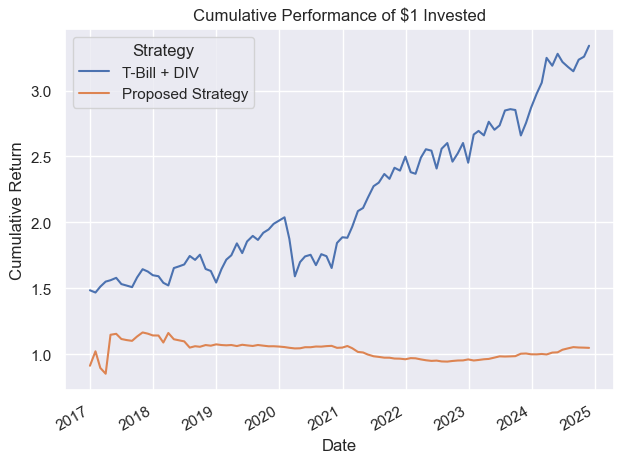

In [262]:
# Calculate the cumulative returns for FUND and STRAT
import matplotlib.pyplot as plt

# monthly returns
# R_fund_old = r_tbill + a * (r_div - r_tbill)
fund_return_old = div['r_tbill'] + a * div['r_div_excess']
fund_return_old.name = 'T-Bill + DIV'
# R_fund_new = r_tbill + b*(r_div - r_tbill) + c*r_strat
fund_return_new = optimal_df['r_tbill'] + final_b_c_df['b'] * optimal_df['r_div_excess'] + final_b_c_df['c'] * optimal_df['r_strat']
fund_return_new.name = 'Proposed Strategy'

# cumulative returns
cum_fund_return_old = (1 + fund_return_old).cumprod()
cum_strat_return = (1 + fund_return_new).cumprod()

funds_df = pd.concat([cum_fund_return_old, cum_strat_return], axis=1, join='inner')


# Plot cumulative performance
plt.figure(figsize=(12, 8))
funds_df.plot()

plt.title('Cumulative Performance of $1 Invested')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(title='Strategy')
plt.grid(True)
plt.tight_layout()

plt.savefig('cumulative_performance_comparison.png')



In [263]:
def calculate_performance_metrics(returns, risk_free_rate):
    common_index = returns.index.intersection(risk_free_rate.index)
    returns_aligned = returns.loc[common_index]
    rf_aligned = risk_free_rate.loc[common_index]
    
    annualized_mean = returns_aligned.mean() * 12
    annualized_std = returns_aligned.std() * np.sqrt(12)
    annualized_rf_mean = rf_aligned.mean() * 12
    sharpe_ratio = (annualized_mean - annualized_rf_mean) / annualized_std
    
    return annualized_mean, annualized_std, sharpe_ratio

mean_old, std_old, sharpe_old = calculate_performance_metrics(fund_return_old, div['r_tbill'])
mean_new, std_new, sharpe_new = calculate_performance_metrics(fund_return_new, optimal_df['r_tbill'])

metrics_df = pd.DataFrame({
    'T-Bill + DIV Strategy': [mean_old, std_old, sharpe_old],
    'Proposed Strategy (with Overlay)': [mean_new, std_new, sharpe_new]
}, index=['Annualized Mean', 'Annualized Std Dev', 'Sharpe Ratio'])

print(metrics_df)


                    T-Bill + DIV Strategy  Proposed Strategy (with Overlay)
Annualized Mean              0.0794676963                      0.0155717396
Annualized Std Dev           0.1498295955                      0.1501048118
Sharpe Ratio                 0.4484614797                     -0.0341199777


## part 9

In [264]:
ff5 = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', index_col=0, parse_dates=True)
ff5.index = pd.to_datetime(ff5.index, format='%Y%m')

ff5 = ff5.loc['2016-12-30':]  
ff5.head()

C:\Users\kaoru\AppData\Local\Temp\ipykernel_35532\3409422951.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ff5 = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', index_col=0, parse_dates=True)


,Mkt-RF,SMB,HML,RMW,CMA,RF
2017-01-01,1.9400000000,-1.4400000000,-2.7600000000,-0.5100000000,-1.0600000000,0.0400000000
2017-02-01,3.5500000000,-2.3000000000,-1.5000000000,0.4500000000,-1.8000000000,0.0400000000
2017-03-01,0.1700000000,0.7500000000,-3.3300000000,0.6300000000,-0.9500000000,0.0300000000
2017-04-01,1.0800000000,0.4100000000,-2.0500000000,1.7900000000,-1.6000000000,0.0500000000
2017-05-01,1.0700000000,-2.9900000000,-3.8200000000,0.9900000000,-1.6600000000,0.0600000000


In [265]:
import statsmodels.api as sm

y = fund_return_new - optimal_df['r_tbill']
y.name = 'Strategy_Excess_Return'

# merge by month
y.index = y.index.to_period('M')
ff5.index = pd.to_datetime(ff5.index).to_period('M') 
data = pd.concat([y, ff5], axis=1, join='inner').dropna()

#regression
y = data['Strategy_Excess_Return']
X = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Strategy_Excess_Return   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                 -0.037
Method:                     Least Squares   F-statistic:                    0.3274
Date:                    Sun, 15 Jun 2025   Prob (F-statistic):              0.895
Time:                            11:48:39   Log-Likelihood:                 166.49
No. Observations:                      95   AIC:                            -321.0
Df Residuals:                          89   BIC:                            -305.7
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       